In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
import hopsworks

# Login to the Hopsworks project using your API key
project = hopsworks.login(
    api_key_value="uVSWPn5SRhttOERh.NysMaEwnuCSaxzsMg3MJf9uzIuqM6Jwt8go5sR6hY1pG04ZrW8aM1BwmyywdIcQX")

# Get the feature store instance
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043609
2024-09-25 10:41:00,576 WARNING: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead

2024-09-25 10:41:00,576 WARNING: using legacy validation callback
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
feature_group_city_weather = fs.get_feature_group(
    name="city_weather_features", version=1)
feature_group_trucks = fs.get_feature_group(name="trucks_features", version=1)
feature_group_truck_schedule = fs.get_feature_group(
    name="trucks_schedule_features", version=1)
feature_group_routes_weather = fs.get_feature_group(
    name="routes_weather_features", version=1)
feature_group_routes = fs.get_feature_group(name="routes_features", version=1)
feature_group_traffic = fs.get_feature_group(
    name="traffic_features", version=1)
feature_group_drivers = fs.get_feature_group(
    name="drivers_features", version=1)

In [4]:
feature_descriptions_drivers = [
          
              {"name": "driver_id", "description": "unique identification for each driver"},
              {"name": "name", "description": "name of the truck driver"},
              {"name": "age", "description": "age of the truck driver"},
              {"name": "experience", "description": "experience of the truck driver in years"},
              {"name": "driving_style", "description": "driving style of the truck driver, conservative or proactive"},
              {"name": "ratings", "description": "average rating of the truck driver on a scale of 1 to 5"},
              {"name": "vehicle_no", "description": "the number of the driver’s truck"},
              {"name": "average_speed_mph", "description": "average speed of the truck driver in miles per hour"},
              {"name": "event_date", "description": "dummy event time"}
          
          ]

for desc in feature_descriptions_drivers:
    feature_group_drivers.update_feature_description(desc["name"], desc["description"])

In [5]:
feature_descriptions_trucks = [
          
              {"name": "truck_id", "description": "unique identification for each truck"},
              {"name": "truck_age", "description": "age of each truck"},
              {"name": "load_capacity_pounds", "description": "load in pounds"},
              {"name": "mileage_mpg", "description": "efficiency in miles per gallon"},
              {"name": "fuel_type", "description": "kind of fuel truck uses"},
              {"name": "event_date", "description": "dummy event time"}
          
          ]

for desc in feature_descriptions_trucks:
    feature_group_trucks.update_feature_description(desc["name"], desc["description"])

In [6]:
feature_descriptions_trucks_schedule = [
          
              {"name": "truck_id", "description": "unique identification for each truck"},
              {"name": "route_id", "description": "route in which truck journey is defined"},
              {"name": "departure_date", "description": "time at departure"},
              {"name": "estimated_arrival", "description": "expected arrival time"},
              {"name": "delay", "description": "0 for no delay, 1 for delay"},
              {"name": "event_date", "description": "dummy event time"}
          
          ]

for desc in feature_descriptions_trucks_schedule:
    feature_group_truck_schedule.update_feature_description(desc["name"], desc["description"])

In [7]:
feature_descriptions_traffic = [
          
              {"name": "route_id", "description": "each route"},
              {"name": "no_of_vehicles", "description": "vehicle count in the route and time"},
              {"name": "accident", "description": "are there any accidents"},
              {"name": "datetime", "description": "traffic in each hour in a day"},
              {"name": "event_date", "description": "dummy event time"}
          
          ]

for desc in feature_descriptions_traffic:
    feature_group_traffic.update_feature_description(desc["name"], desc["description"])

In [8]:
feature_descriptions_routes_weather = [
          
              {"name": "route_id", "description": "unique identification for each route"},
              {"name": "date", "description": "date regarding the weather condition in route reported every 6 hrs"},
              {"name": "temp", "description": "temperature in farenheit"},
              {"name": "wind_speed", "description": "speed of wind"},
              {"name": "description", "description": "weather condition eg like rainy,sunny etc"},
              {"name": "humidity", "description": "value of humidity"},
              {"name": "pressure", "description": "pressure outside"},
              {"name": "event_date", "description": "dummy event time"}
          
          ]

for desc in feature_descriptions_routes_weather:
    feature_group_routes_weather.update_feature_description(desc["name"], desc["description"])

In [9]:
feature_descriptions_routes = [
          
              {"name": "route_id", "description": "unique identification for each route"},
              {"name": "origin_id", "description": "origin"},
              {"name": "destination_id", "description": "destination"},
              {"name": "distance", "description": "length of the route"},
              {"name": "average_hours", "description": "time to cover the route"},
              {"name": "event_date", "description": "dummy event time"}
          
          ]

for desc in feature_descriptions_routes:
    feature_group_routes.update_feature_description(desc["name"], desc["description"])

In [10]:
feature_descriptions_city_weather = [
          
              {"name": "city_id", "description": "each city_id"},
              {"name": "datetime", "description": "date regarding the weather condition in route reported every 6 hrs"},
              {"name": "temp", "description": "temperature in farenheit"},
              {"name": "wind_speed", "description": "speed of wind"},
              {"name": "description", "description": "weather condition eg like rainy,sunny etc"},
              {"name": "humidity", "description": "value of humidity"},
              {"name": "pressure", "description": "pressure outside"},
              {"name": "event_date", "description": "dummy event time"}
          
          ]

for desc in feature_descriptions_city_weather:
    feature_group_city_weather.update_feature_description(desc["name"], desc["description"])

In [11]:
# feature_group_drivers.statistics_config = {
#                "enabled": True,        
#                "histograms": True,     
#                "correlations": True    
#            }
           
           
# feature_group_drivers.update_statistics_config()
           
           
# feature_group_drivers.compute_statistics()

In [29]:
# from datetime import datetime

# # Check if 'wallclock_time' is already defined; if not, set it to the current time
# if 'wallclock_time' not in locals():
#     wallclock_time = datetime.now()

# # Debugging: print wallclock_time
# print(f"Wallclock Time: {wallclock_time}")


Wallclock Time: 2024-09-24 22:46:10.731020


In [12]:
# from datetime import datetime

# # Set wallclock_time to current time if not provided
# wallclock_time = datetime.now()

# # Fetch commit details
# commit_details = feature_group_drivers._feature_group_engine.commit_details(
#     feature_group_drivers, wallclock_time, 1
# )

# # Debugging: print the commit details
# print(f"Commit Details: {commit_details}")

# # Extract commit IDs
# commit_ids = [commit_id for commit_id in commit_details.keys()]

# # Check if commit_ids is empty before accessing
# if not commit_ids:
#     raise ValueError("No commit IDs found for the given wallclock time.")

# # Access the first commit ID if available
# fg_commit_id = commit_ids[0]

# # Proceed with statistics computation
# print(f"Selected Commit ID: {fg_commit_id}")



In [23]:
# from datetime import datetime

# # Use current time if wallclock_time is not provided
# wallclock_time = wallclock_time if 'wallclock_time' in locals() else datetime.now()

# # Debugging: print wallclock_time
# print(f"Wallclock Time: {wallclock_time}")


Wallclock Time: 2024-09-24 22:42:59.835442


In [25]:
# class FeatureGroupHandler:
#     def compute_statistics(self, wallclock_time=None):
#         from datetime import datetime
        
#         # Set wallclock_time to the current time if not provided
#         wallclock_time = wallclock_time or datetime.now()
        
#         # Fetch commit details
#         commit_details = self._feature_group_engine.commit_details(self, wallclock_time, 1)
        
#         # Print commit details for debugging
#         print(f"Commit Details: {commit_details}")
        
#         commit_ids = [commit_id for commit_id in commit_details.keys()]
        
#         if not commit_ids:
#             raise ValueError("No commit IDs found for the given wallclock time.")
        
#         fg_commit_id = commit_ids[0]
#         print(f"Selected Commit ID: {fg_commit_id}")


In [13]:
# feature_group_trucks.statistics_config = {
#                "enabled": True,        # Enable statistics calculation
#                "histograms": True,     # Include histograms in the statistics
#                "correlations": True    # Include correlations in the statistics
#            }
           
#            # Update the statistics configuration for the feature group
# feature_group_trucks.update_statistics_config()
           
#            # Compute statistics for the feature group
# feature_group_trucks.compute_statistics()

In [ ]:
# feature_group_truck_schedule.statistics_config = {
#                "enabled": True,        # Enable statistics calculation
#                "histograms": True,     # Include histograms in the statistics
#                "correlations": True    # Include correlations in the statistics
#            }
           
#            # Update the statistics configuration for the feature group
# feature_group_truck_schedule.update_statistics_config()
           
#            # Compute statistics for the feature group
# feature_group_truck_schedule.compute_statistics()

In [ ]:
# feature_group_traffic.statistics_config = {
#                "enabled": True,        # Enable statistics calculation
#                "histograms": True,     # Include histograms in the statistics
#                "correlations": True    # Include correlations in the statistics
#            }
           
#            # Update the statistics configuration for the feature group
# feature_group_traffic.update_statistics_config()
           
#            # Compute statistics for the feature group
# feature_group_traffic.compute_statistics()

In [ ]:
# feature_group_routes.statistics_config = {
#                "enabled": True,        # Enable statistics calculation
#                "histograms": True,     # Include histograms in the statistics
#                "correlations": True    # Include correlations in the statistics
#            }
           
#            # Update the statistics configuration for the feature group
# feature_group_routes.update_statistics_config()
           
#            # Compute statistics for the feature group
# feature_group_routes.compute_statistics()

In [ ]:
# feature_group_routes_weather.statistics_config = {
#                "enabled": True,        # Enable statistics calculation
#                "histograms": True,     # Include histograms in the statistics
#                "correlations": True    # Include correlations in the statistics
#            }
           
#            # Update the statistics configuration for the feature group
# feature_group_routes_weather.update_statistics_config()
           
#            # Compute statistics for the feature group
# feature_group_routes_weather.compute_statistics()

In [ ]:
# feature_group_city_weather.statistics_config = {
#                "enabled": True,        # Enable statistics calculation
#                "histograms": True,     # Include histograms in the statistics
#                "correlations": True    # Include correlations in the statistics
#            }
           
#            # Update the statistics configuration for the feature group
# feature_group_city_weather.update_statistics_config()
           
#            # Compute statistics for the feature group
# feature_group_city_weather.compute_statistics()

In [11]:
df_trucks = feature_group_trucks.read()
df_truck_schedule = feature_group_truck_schedule.read()
df_traffic = feature_group_traffic.read()
df_routes_weather = feature_group_routes_weather.read()
df_routes = feature_group_routes.read()
df_drivers = feature_group_drivers.read()
df_city_weather = feature_group_city_weather.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.55s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.78s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (12.05s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (15.68s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.59s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.55s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.42s) 


In [12]:
df_trucks = df_trucks.drop(columns=['event_date', 'index'])
df_truck_schedule = df_truck_schedule.drop(columns=['event_date', 'index'])
df_traffic = df_traffic.drop(columns=['event_date', 'index'])
df_routes_weather = df_routes_weather.drop(columns=['event_date', 'index'])
df_routes = df_routes.drop(columns=['event_date', 'index'])
df_drivers = df_drivers.drop(columns=['event_date', 'index'])
df_city_weather = df_city_weather.drop(columns=['event_date', 'index'])

In [13]:
df_trucks

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,20698203,11,4000.0,16,gas
1,21098319,9,6000.0,26,diesel
2,15436397,8,10000.0,23,diesel
3,10379022,9,3000.0,15,gas
4,43523687,12,3000.0,18,gas
...,...,...,...,...,...
1196,29839726,10,20000.0,16,gas
1197,93428273,9,20000.0,18,gas
1198,19695271,13,3000.0,24,diesel
1199,21539605,8,3000.0,18,gas


In [14]:
df_trucks.shape

(1201, 5)

In [15]:
df_city_weather

,city_id,temp,wind_speed,description,humidity,pressure,datetime
0,C-328bd8d3,32,7,Clear,78,1018,2019-01-03 19:00:00+00:00
1,C-b6e04c88,14,13,Sunny,53,1023,2019-01-29 07:00:00+00:00
2,C-c7cacd1d,14,3,Clear,82,1030,2019-01-17 05:00:00+00:00
3,C-451776b7,57,1,Clear,57,1018,2019-02-08 21:00:00+00:00
4,C-56b68559,10,7,Cloudy,89,1023,2019-02-01 23:00:00+00:00
...,...,...,...,...,...,...,...
51829,C-b5ff31cd,27,10,Overcast,33,1019,2019-01-28 12:00:00+00:00
51830,C-731988ba,84,6,Sunny,47,1010,2019-01-23 14:00:00+00:00
51831,C-b25a09de,25,10,Light snow,72,1019,2019-01-25 07:00:00+00:00
51832,C-3dbd8b2e,46,4,Partly cloudy,61,1013,2019-01-30 17:00:00+00:00


In [16]:
from datetime import datetime
df_city_weather['datetime'] = df_city_weather['datetime'].astype(str)

# Now you can use the .str accessor
df_city_weather['datetime'] = df_city_weather['datetime'].str.split('+').str[0]

# Optionally convert back to datetime
df_city_weather['datetime'] = pd.to_datetime(df_city_weather['datetime'])

In [17]:
df_city_weather.shape

(51834, 7)

In [18]:
df_drivers.shape

(1283, 8)

In [19]:
df_drivers

,driver_id,name,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,a082299f-f,Justin Robbins,48,19.0,conservative,7,20698203,45.880001
1,714f9353-9,Charles Malone,46,13.0,proactive,4,21098319,60.130001
2,4f55b204-f,Xavier Johnson,47,1.0,proactive,8,15436397,60.919998
3,363151a2-e,Thomas Goodman,45,15.0,proactive,4,10379022,59.049999
4,d1a55f05-9,James Alvarez,47,3.0,proactive,4,43523687,61.369999
...,...,...,...,...,...,...,...,...
1278,1ad470f8-9,Zachary Woods,50,10.0,conservative,3,93428273,38.810001
1279,53f3f0fb-d,Patrick Fuentes,39,5.0,conservative,3,21539605,47.220001
1280,fc5bb863-b,Robert Cohen,42,13.0,proactive,8,19695271,65.040001
1281,8460ef47-6,Nicholas Martinez,56,18.0,proactive,6,10008392,60.740002


In [20]:
df_routes.shape

(2352, 5)

In [21]:
df_routes

,route_id,origin_id,destination_id,distance,average_hours
0,R-6a0225bb,C-e5bfb4e5,C-731988ba,2760.850098,55.220001
1,R-02124ef5,C-c4565ee8,C-3dbd8b2e,2018.079956,40.360001
2,R-ec63e5e9,C-9bbf5d8a,C-2bd47dc5,429.100006,8.580000
3,R-c970877c,C-b5282c3b,C-d80a1e7d,218.309998,4.370000
4,R-69b48415,C-e5bfb4e5,C-73ae5412,1619.869995,32.400002
...,...,...,...,...,...
2347,R-8663c466,C-451776b7,C-9bbf5d8a,2184.699951,43.689999
2348,R-144f4305,C-e6dcda92,C-56b68559,321.109985,6.420000
2349,R-237fd22b,C-b6e04c88,C-639c5e36,1170.780029,23.420000
2350,R-f14d053c,C-40a81eb1,C-b5ff31cd,53.189999,1.060000


In [22]:
df_routes_weather.shape

(396149, 7)

In [23]:
df_routes_weather

,route_id,date,temp,wind_speed,description,humidity,pressure
0,R-2e17fb9b,2019-02-02 18:00:00,39,4,Partly cloudy,64,1010
1,R-e636bb23,2019-02-05 18:00:00,45,14,Partly cloudy,85,1005
2,R-073654b1,2019-01-13 12:00:00,48,17,Overcast,79,1018
3,R-d2761115,2019-01-02 12:00:00,45,14,Light rain,90,1002
4,R-20cb905f,2019-02-12 18:00:00,59,7,Sunny,66,1018
...,...,...,...,...,...,...,...
396144,R-4e70c06b,2019-02-06 12:00:00,75,7,Patchy rain possible,75,1007
396145,R-1b9ec3cf,2019-01-14 06:00:00,75,5,Clear,78,1015
396146,R-7c82dd63,2019-01-18 18:00:00,54,6,Partly cloudy,83,1016
396147,R-f93b30d7,2019-02-10 06:00:00,72,2,Sunny,38,1015


In [24]:
df_truck_schedule.shape

(12308, 5)

In [25]:
df_truck_schedule

,truck_id,route_id,departure_date,estimated_arrival,delay
0,27086559,R-3156d2b2,2019-01-01 07:00:00,2019-01-02 02:45:36+00:00,1
1,14688558,R-9e9cc6a6,2019-01-04 07:00:00,2019-01-04 10:51:36+00:00,0
2,21539605,R-7171a317,2019-01-13 07:00:00,2019-01-13 20:28:48+00:00,0
3,91138034,R-a3875fe2,2019-02-03 07:00:00,2019-02-03 09:47:24+00:00,0
4,83770030,R-c12ce254,2019-02-05 07:00:00,2019-02-06 11:12:00+00:00,0
...,...,...,...,...,...
12303,27121057,R-e3426e4e,2019-01-25 07:00:00,2019-01-26 00:39:00+00:00,1
12304,12323896,R-fe48566e,2019-01-31 07:00:00,2019-01-31 08:19:12+00:00,0
12305,24288637,R-ec63e5e9,2019-02-03 07:00:00,2019-02-03 15:34:47.999000+00:00,0
12306,21016823,R-213f3356,2019-01-25 07:00:00,2019-01-27 08:51:36+00:00,0


In [29]:
# Step 1: Remove the part after the '+' (including any fractional seconds)
df_truck_schedule['estimated_arrival'] = df_truck_schedule['estimated_arrival'].astype(str).str.split('+').str[0].str.split('.').str[0]

# Step 2: Convert to datetime without the fractional seconds
df_truck_schedule['estimated_arrival'] = pd.to_datetime(df_truck_schedule['estimated_arrival'], format='%Y-%m-%d %H:%M:%S')

# Display the result
df_truck_schedule


,truck_id,route_id,departure_date,estimated_arrival,delay
0,27086559,R-3156d2b2,2019-01-01 07:00:00,2019-01-02 02:45:36,1
1,14688558,R-9e9cc6a6,2019-01-04 07:00:00,2019-01-04 10:51:36,0
2,21539605,R-7171a317,2019-01-13 07:00:00,2019-01-13 20:28:48,0
3,91138034,R-a3875fe2,2019-02-03 07:00:00,2019-02-03 09:47:24,0
4,83770030,R-c12ce254,2019-02-05 07:00:00,2019-02-06 11:12:00,0
...,...,...,...,...,...
12303,27121057,R-e3426e4e,2019-01-25 07:00:00,2019-01-26 00:39:00,1
12304,12323896,R-fe48566e,2019-01-31 07:00:00,2019-01-31 08:19:12,0
12305,24288637,R-ec63e5e9,2019-02-03 07:00:00,2019-02-03 15:34:47,0
12306,21016823,R-213f3356,2019-01-25 07:00:00,2019-01-27 08:51:36,0


In [30]:

df_truck_schedule

,truck_id,route_id,departure_date,estimated_arrival,delay
0,27086559,R-3156d2b2,2019-01-01 07:00:00,2019-01-02 02:45:36,1
1,14688558,R-9e9cc6a6,2019-01-04 07:00:00,2019-01-04 10:51:36,0
2,21539605,R-7171a317,2019-01-13 07:00:00,2019-01-13 20:28:48,0
3,91138034,R-a3875fe2,2019-02-03 07:00:00,2019-02-03 09:47:24,0
4,83770030,R-c12ce254,2019-02-05 07:00:00,2019-02-06 11:12:00,0
...,...,...,...,...,...
12303,27121057,R-e3426e4e,2019-01-25 07:00:00,2019-01-26 00:39:00,1
12304,12323896,R-fe48566e,2019-01-31 07:00:00,2019-01-31 08:19:12,0
12305,24288637,R-ec63e5e9,2019-02-03 07:00:00,2019-02-03 15:34:47,0
12306,21016823,R-213f3356,2019-01-25 07:00:00,2019-01-27 08:51:36,0


In [31]:
df_traffic.shape

(2459682, 4)

In [32]:
df_traffic

,route_id,no_of_vehicles,accident,datetime
0,R-af1c0f31,1728.0,0,2019-02-05 23:00:00+00:00
1,R-b3a6d415,2277.0,0,2019-01-14 16:00:00+00:00
2,R-373eec36,2127.0,0,2019-02-04 11:00:00+00:00
3,R-13d6ba5c,609.0,0,2019-01-08 03:00:00+00:00
4,R-9bdd8c00,2259.0,0,2019-01-17 22:00:00+00:00
...,...,...,...,...
2459677,R-a6faaa76,468.0,0,2019-01-31 00:00:00+00:00
2459678,R-d4576c6e,156.0,0,2019-01-22 09:00:00+00:00
2459679,R-88d4c432,133.0,0,2019-01-12 09:00:00+00:00
2459680,R-695dcbf7,2445.0,0,2019-01-20 20:00:00+00:00


In [33]:
from datetime import datetime
df_traffic['datetime'] = df_traffic['datetime'].astype(str)

# Now you can use the .str accessor
df_traffic['datetime'] = df_traffic['datetime'].str.split('+').str[0]

# Optionally convert back to datetime
df_traffic['datetime'] = pd.to_datetime(df_traffic['datetime'])

In [34]:
df_traffic

,route_id,no_of_vehicles,accident,datetime
0,R-af1c0f31,1728.0,0,2019-02-05 23:00:00
1,R-b3a6d415,2277.0,0,2019-01-14 16:00:00
2,R-373eec36,2127.0,0,2019-02-04 11:00:00
3,R-13d6ba5c,609.0,0,2019-01-08 03:00:00
4,R-9bdd8c00,2259.0,0,2019-01-17 22:00:00
...,...,...,...,...
2459677,R-a6faaa76,468.0,0,2019-01-31 00:00:00
2459678,R-d4576c6e,156.0,0,2019-01-22 09:00:00
2459679,R-88d4c432,133.0,0,2019-01-12 09:00:00
2459680,R-695dcbf7,2445.0,0,2019-01-20 20:00:00


In [35]:
def custom_mode(x):
  return x.mode().iloc[0]

In [36]:
df_city_weather

,city_id,temp,wind_speed,description,humidity,pressure,datetime
0,C-328bd8d3,32,7,Clear,78,1018,2019-01-03 19:00:00
1,C-b6e04c88,14,13,Sunny,53,1023,2019-01-29 07:00:00
2,C-c7cacd1d,14,3,Clear,82,1030,2019-01-17 05:00:00
3,C-451776b7,57,1,Clear,57,1018,2019-02-08 21:00:00
4,C-56b68559,10,7,Cloudy,89,1023,2019-02-01 23:00:00
...,...,...,...,...,...,...,...
51829,C-b5ff31cd,27,10,Overcast,33,1019,2019-01-28 12:00:00
51830,C-731988ba,84,6,Sunny,47,1010,2019-01-23 14:00:00
51831,C-b25a09de,25,10,Light snow,72,1019,2019-01-25 07:00:00
51832,C-3dbd8b2e,46,4,Partly cloudy,61,1013,2019-01-30 17:00:00


In [37]:
df_drivers

,driver_id,name,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,a082299f-f,Justin Robbins,48,19.0,conservative,7,20698203,45.880001
1,714f9353-9,Charles Malone,46,13.0,proactive,4,21098319,60.130001
2,4f55b204-f,Xavier Johnson,47,1.0,proactive,8,15436397,60.919998
3,363151a2-e,Thomas Goodman,45,15.0,proactive,4,10379022,59.049999
4,d1a55f05-9,James Alvarez,47,3.0,proactive,4,43523687,61.369999
...,...,...,...,...,...,...,...,...
1278,1ad470f8-9,Zachary Woods,50,10.0,conservative,3,93428273,38.810001
1279,53f3f0fb-d,Patrick Fuentes,39,5.0,conservative,3,21539605,47.220001
1280,fc5bb863-b,Robert Cohen,42,13.0,proactive,8,19695271,65.040001
1281,8460ef47-6,Nicholas Martinez,56,18.0,proactive,6,10008392,60.740002


In [38]:
pip install seaborn

2024-09-25 10:47:22,375 WARNING: DeprecationWarning: This process (pid=1588) is multi-threaded, use of forkpty() may lead to deadlocks in the child.



Note: you may need to restart the kernel to use updated packages.


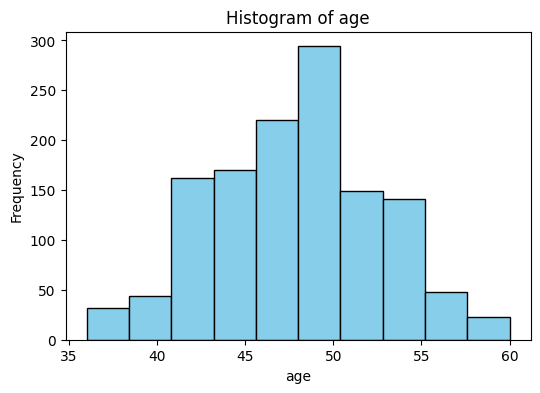

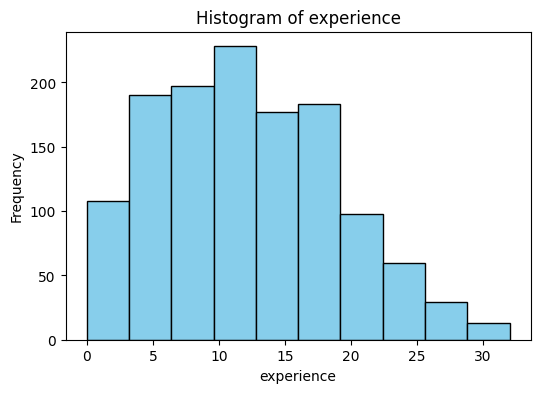

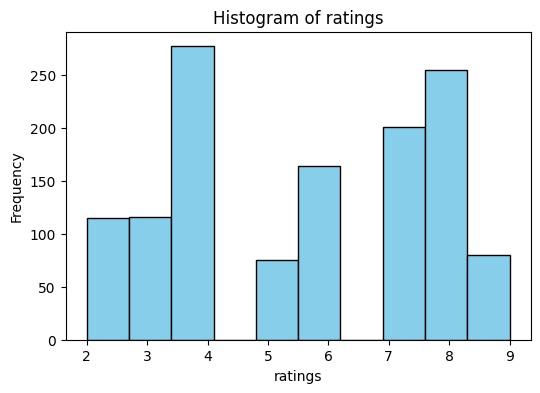

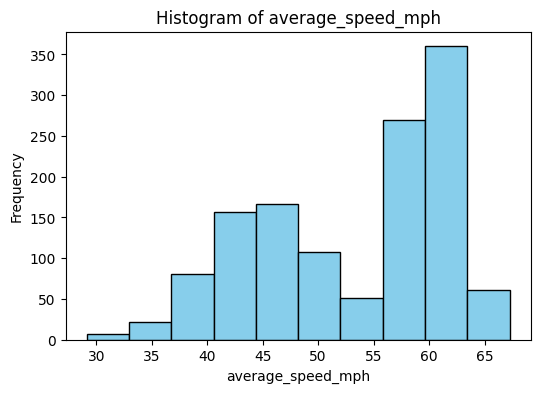

In [39]:
df = pd.DataFrame(df_drivers)
numeric_features = ['age', 'experience', 'ratings', 'average_speed_mph']

# Plot histograms for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    plt.hist(df[feature], bins=10, color='skyblue', edgecolor='black')  # Remove 'data=' from here
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    

    



# Most the trucks average speed is ranging from 57mph-63mph \\
# The average ratings of the drivers are between 3-4 and 7.5-8.5 \\
# Majority of the drivers have an experience between 5-11 years \\
# Majority of the drivers age ranges between 45-50 years \\

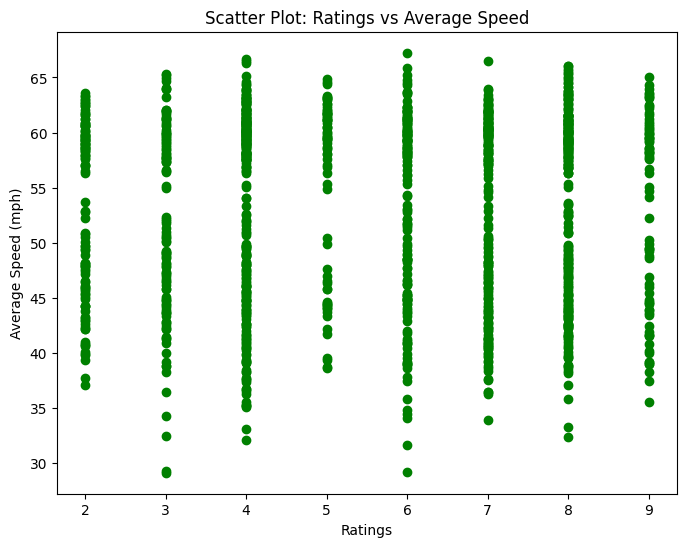

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df['ratings'], df['average_speed_mph'], color='green')
plt.title('Scatter Plot: Ratings vs Average Speed')
plt.xlabel('Ratings')
plt.ylabel('Average Speed (mph)')
plt.show()


# irrespective of ratings majority of the drivers and their average speed ranges between 50-60 which is almost the same that we have seen in our univariate analysis

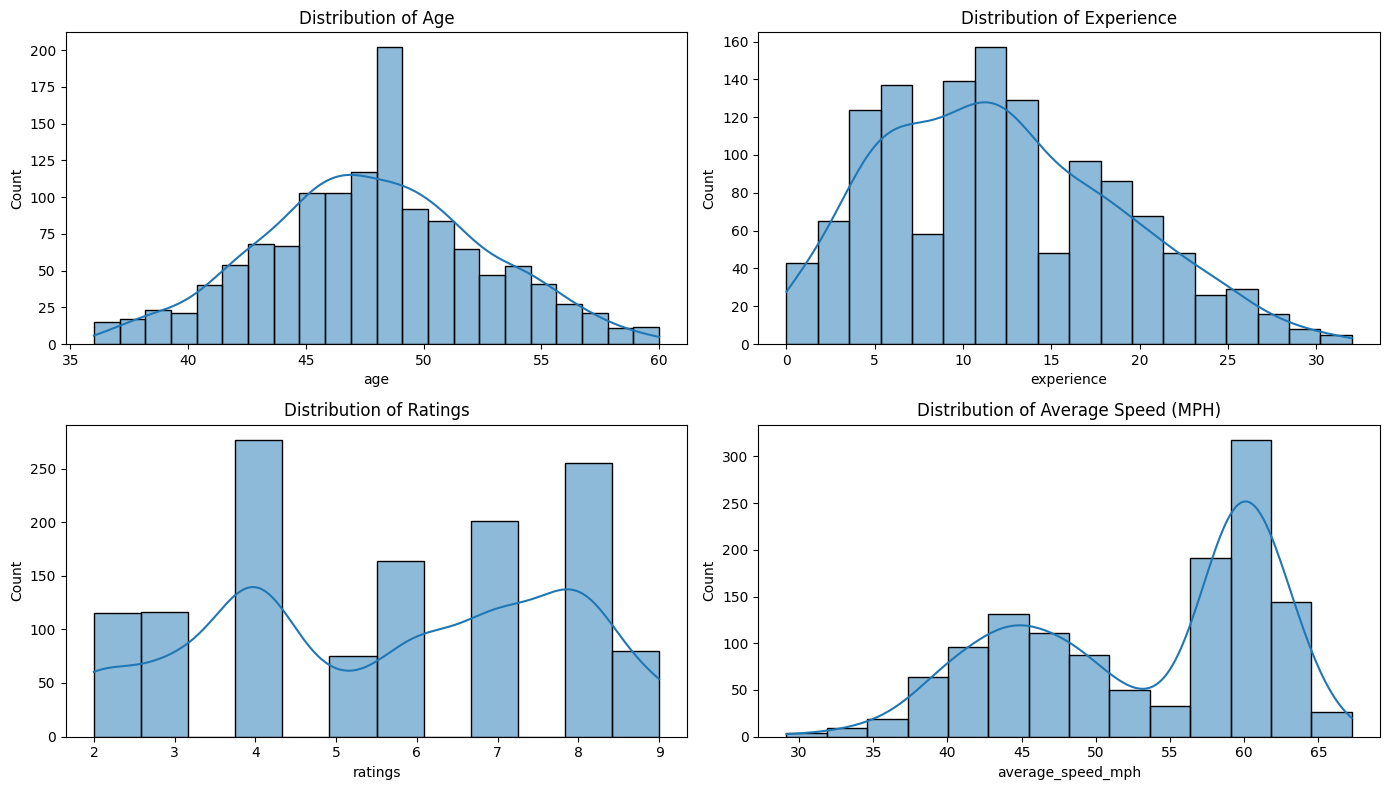

In [42]:
plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['experience'], kde=True)
plt.title('Distribution of Experience')

plt.subplot(2, 2, 3)
sns.histplot(df['ratings'], kde=True)
plt.title('Distribution of Ratings')

plt.subplot(2, 2, 4)
sns.histplot(df['average_speed_mph'], kde=True)
plt.title('Distribution of Average Speed (MPH)')

plt.tight_layout()
plt.show()

1.Most the trucks average speed is ranging from 57mph-63mph 

2.The average ratings of the drivers are between 3-4 and 7.5-8.5 

3.Majority of the drivers have an experience between 5-11 years 

4.Majority of the drivers age ranges between 45-50 years \\

Text(0.5, 1.0, 'Ratings vs Average Speed')

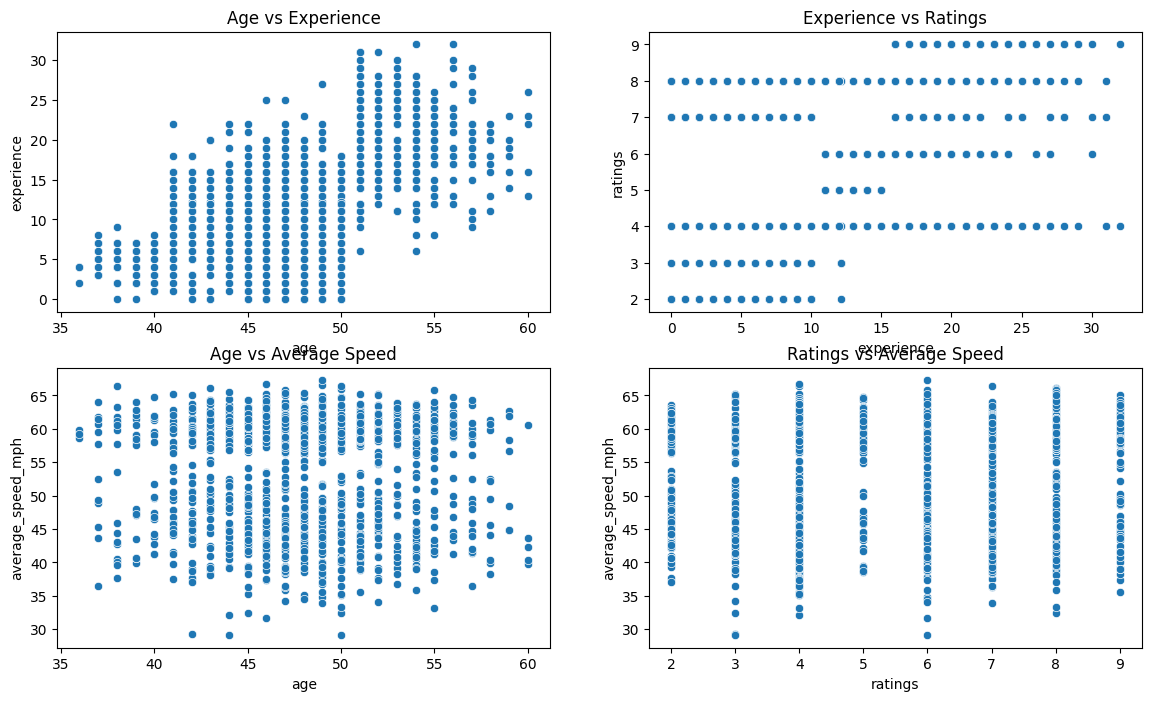

In [44]:
plt.figure(figsize=(14,8))

# Scatter plot: Age vs Experience
plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='experience', data=df)
plt.title('Age vs Experience')

# Scatter plot: Experience vs Ratings
plt.subplot(2, 2, 2)
sns.scatterplot(x='experience', y='ratings', data=df)
plt.title('Experience vs Ratings')

# Scatter plot: Age vs Average Speed
plt.subplot(2, 2, 3)
sns.scatterplot(x='age', y='average_speed_mph', data=df)
plt.title('Age vs Average Speed')

# Scatter plot: Ratings vs Average Speed
plt.subplot(2, 2, 4)
sns.scatterplot(x='ratings', y='average_speed_mph', data=df)
plt.title('Ratings vs Average Speed')



1. This scatter plots above shows the age vs experience -> It tends increase with age which shows consistency in data 

2.There are few drivers with good experience and lower ratings, this could be a bussiness issue about timeley delivery , safe delivery. But as expereice increases from the point of atleast 12 years drivers have a rating of atleast 4 and higly experienced drivers show a good rating which they can provide the insigths to newly recruited drivers about how a delivery should be.

3.Coming to age vs average speed based on their driving style everydriver is maintaing their average speed , young drivers most of them driving at higher speeds, with additive experience drivers with 45-50 years maintaining good average speeds, as age kept increasing avg speeds sligtly falls down.

4. In ratinvs vs avg speed irrespective of ratings, drivers have average speed of atleast 45 mph


In [45]:
df_trucks

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,20698203,11,4000.0,16,gas
1,21098319,9,6000.0,26,diesel
2,15436397,8,10000.0,23,diesel
3,10379022,9,3000.0,15,gas
4,43523687,12,3000.0,18,gas
...,...,...,...,...,...
1196,29839726,10,20000.0,16,gas
1197,93428273,9,20000.0,18,gas
1198,19695271,13,3000.0,24,diesel
1199,21539605,8,3000.0,18,gas


Summary Statistics:
           truck_id    truck_age  load_capacity_pounds  mileage_mpg
count  1.201000e+03  1201.000000           1201.000000  1201.000000
mean   3.249928e+07     9.518734           8534.554688    20.837635
std    2.187359e+07     1.992032           5576.798340     3.692711
min    1.000839e+07     4.000000           3000.000000    11.000000
25%    1.814850e+07     8.000000           4000.000000    18.000000
50%    2.585326e+07    10.000000           6000.000000    21.000000
75%    3.339385e+07    11.000000          15000.000000    24.000000
max    9.998167e+07    15.000000          20000.000000    29.000000


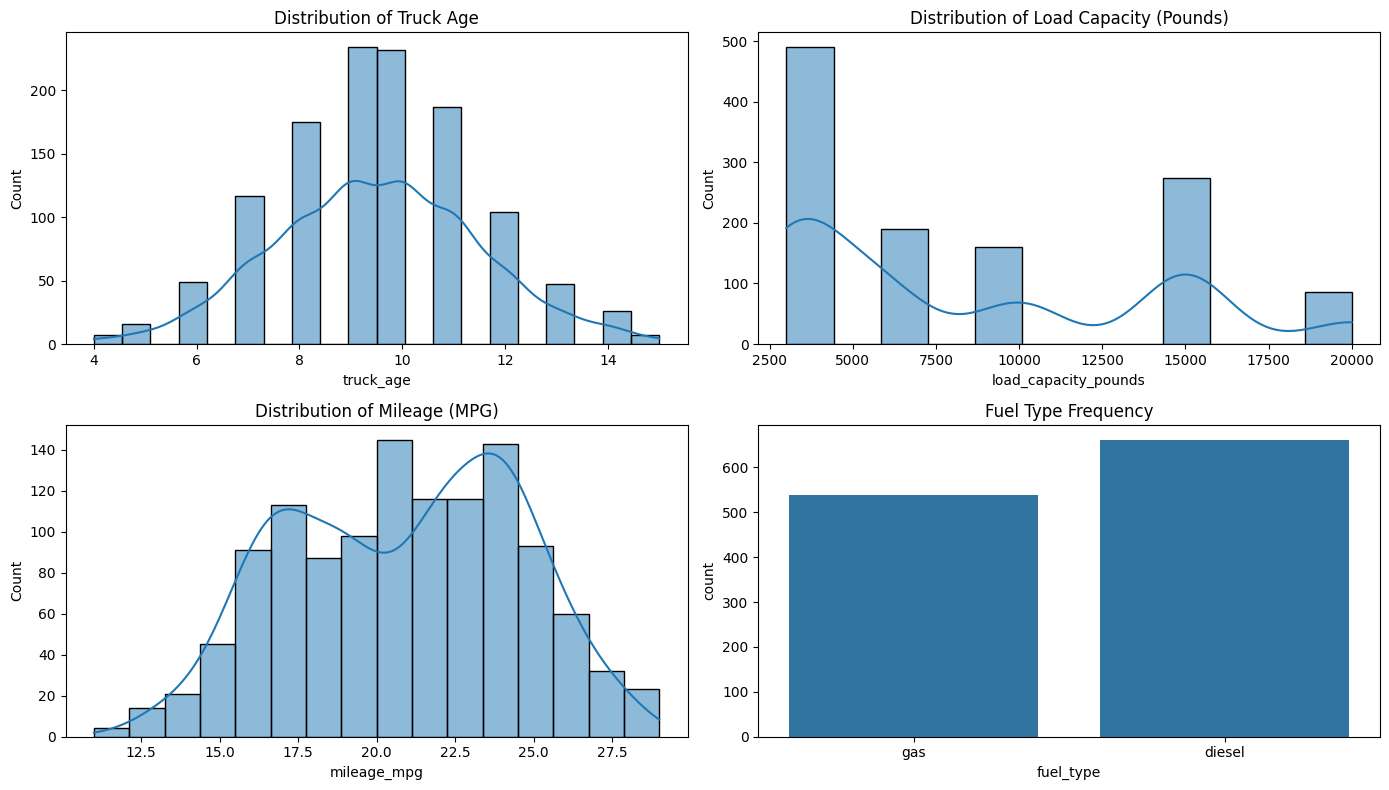

In [46]:
print("Summary Statistics:")
print(df_trucks.describe())

# Distribution of numerical columns
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.histplot(df_trucks['truck_age'], kde=True)
plt.title('Distribution of Truck Age')

plt.subplot(2, 2, 2)
sns.histplot(df_trucks['load_capacity_pounds'], kde=True)
plt.title('Distribution of Load Capacity (Pounds)')

plt.subplot(2, 2, 3)
sns.histplot(df_trucks['mileage_mpg'], kde=True)
plt.title('Distribution of Mileage (MPG)')

plt.subplot(2, 2, 4)
sns.countplot(x='fuel_type', data=df_trucks)
plt.title('Fuel Type Frequency')

plt.tight_layout()
plt.show()

1. Most of the trucks used for delivery are between the age of 9-10 years , new trucks are minimal and very old trucks whose service ends are not used much. 
2. Majority of the delivery size lies between 3000-4000 Pounds where we can mostly use the trucks which can carry such a load, this helps in cost reduction of buying trucks which can carry heavier loads.

3. Average efficieny given by the trucks are around 20-25mpg. it also has impact on the fuel usage, since irrespective of fuel types the average mpg is 20-25 so it would be better to use disel than gas since disel efficiency is higher compared to gas and ofcourse life time value of truck increases.

4. disel trucks are used more and also trucks which give low efficiency are mostly gas trucks.

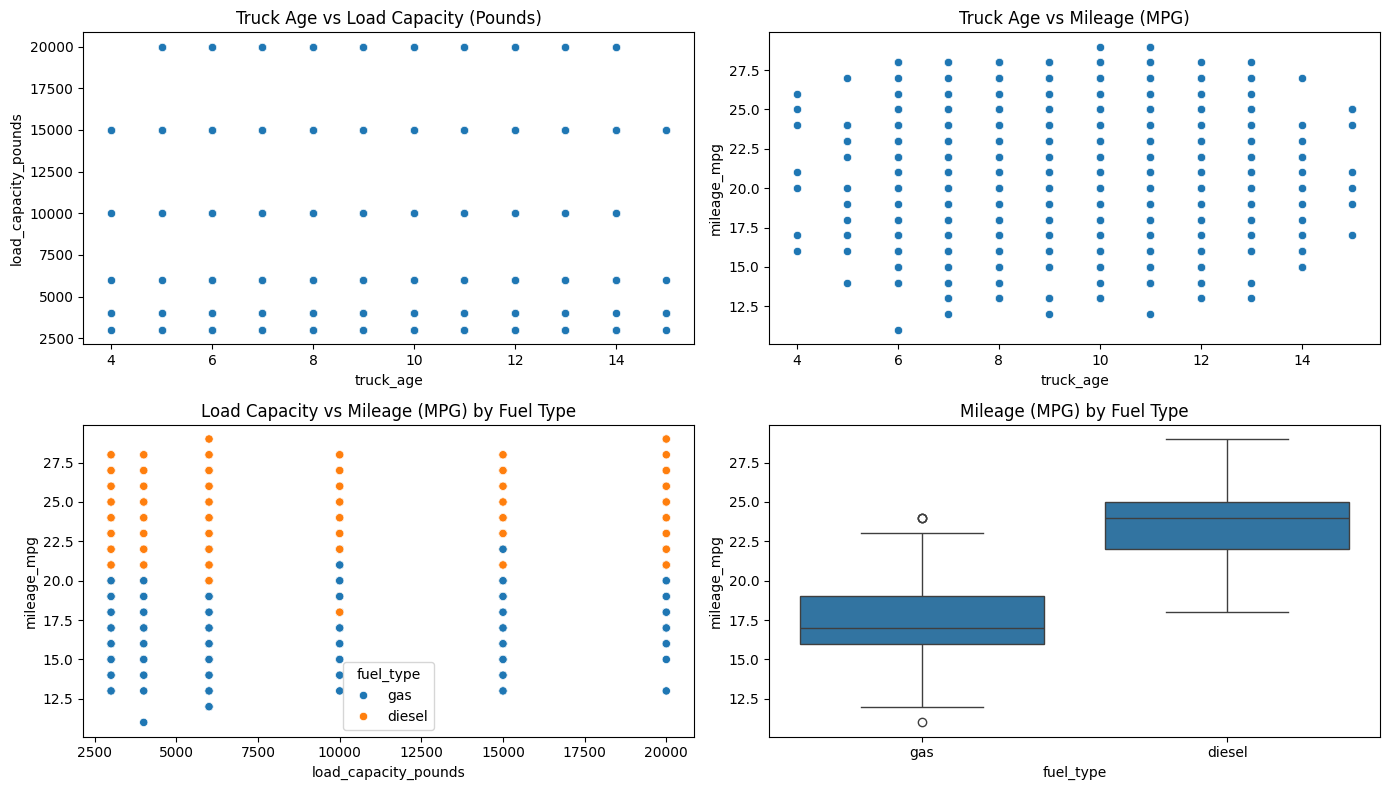

In [48]:
# Bivariate Analysis
plt.figure(figsize=(14, 8))

# Scatter plot: Truck Age vs Load Capacity
plt.subplot(2, 2, 1)
sns.scatterplot(x='truck_age', y='load_capacity_pounds', data=df_trucks)
plt.title('Truck Age vs Load Capacity (Pounds)')

# Scatter plot: Truck Age vs Mileage (MPG)
plt.subplot(2, 2, 2)
sns.scatterplot(x='truck_age', y='mileage_mpg', data=df_trucks)
plt.title('Truck Age vs Mileage (MPG)')

# Scatter plot: Load Capacity vs Mileage (MPG)
plt.subplot(2, 2, 3)
sns.scatterplot(x='load_capacity_pounds', y='mileage_mpg', hue='fuel_type', data=df_trucks)
plt.title('Load Capacity vs Mileage (MPG) by Fuel Type')

# Box plot: Fuel Type vs Mileage (MPG)
plt.subplot(2, 2, 4)
sns.boxplot(x='fuel_type', y='mileage_mpg', data=df_trucks)
plt.title('Mileage (MPG) by Fuel Type')

plt.tight_layout()
plt.show()

# Correlation Matr

1.  irrespective of trucks age we have trucks that can carry all range of loads. since we have mojority of trucks carrying load 3000-4000 pounds. and we can categorize higher loads and specify trucks of this age will carry higher loads. so that the distribution will be nicely divided.

2. New trucks old trucks have good efficiency of atleast 16mpg and age increases from 4-10 the efficiency kept reducing. this might be due to various reasons like maintennace , route in which truck travels, as load increases like new trucks aren;t given higher loads intially their efficincy is good enough but as load increases with trucks as seen above the efficiency decreases. so we can say as load capacity increases the efficiceny decreases. 

3. inorder to slightly compensate the above case we plotted fuel type vs mpg and can clearly see disel trucks gave good efficient of atleat 17.5, so inorder to increase the efficiency new trucks brought should be of disel type

4.The box plot suggest that low efficiency is caused because of gas type fuel. a lot of bussiness can be changed if converted into disel type

In [49]:
df_traffic

,route_id,no_of_vehicles,accident,datetime
0,R-af1c0f31,1728.0,0,2019-02-05 23:00:00
1,R-b3a6d415,2277.0,0,2019-01-14 16:00:00
2,R-373eec36,2127.0,0,2019-02-04 11:00:00
3,R-13d6ba5c,609.0,0,2019-01-08 03:00:00
4,R-9bdd8c00,2259.0,0,2019-01-17 22:00:00
...,...,...,...,...
2459677,R-a6faaa76,468.0,0,2019-01-31 00:00:00
2459678,R-d4576c6e,156.0,0,2019-01-22 09:00:00
2459679,R-88d4c432,133.0,0,2019-01-12 09:00:00
2459680,R-695dcbf7,2445.0,0,2019-01-20 20:00:00


Summary Statistics:
       no_of_vehicles   accident                       datetime
count    2.459682e+06  2459682.0                        2459682
mean     1.560312e+03        0.0  2019-01-23 23:13:51.992916736
min      1.000000e+02        0.0            2019-01-01 00:00:00
25%      6.030000e+02        0.0            2019-01-12 11:00:00
50%      1.965000e+03        0.0            2019-01-23 23:00:00
75%      2.317000e+03        0.0            2019-02-04 11:00:00
max      3.436000e+03        0.0            2019-02-15 23:00:00
std      8.937592e+02        0.0                            NaN
2024-09-25 10:59:48,612 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-25 10:59:49,119 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the app

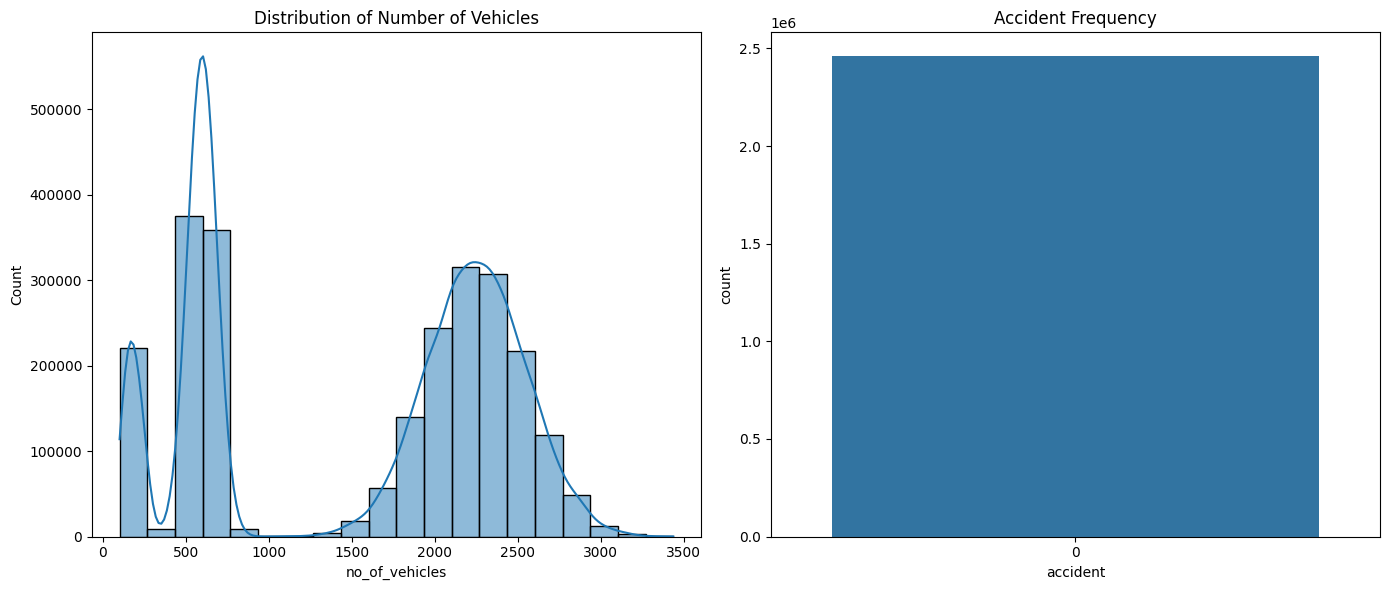

2024-09-25 10:59:51,020 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-25 10:59:51,564 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-25 10:59:52,496 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-25 10:59:53,071 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-25 10:59:54,371 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates

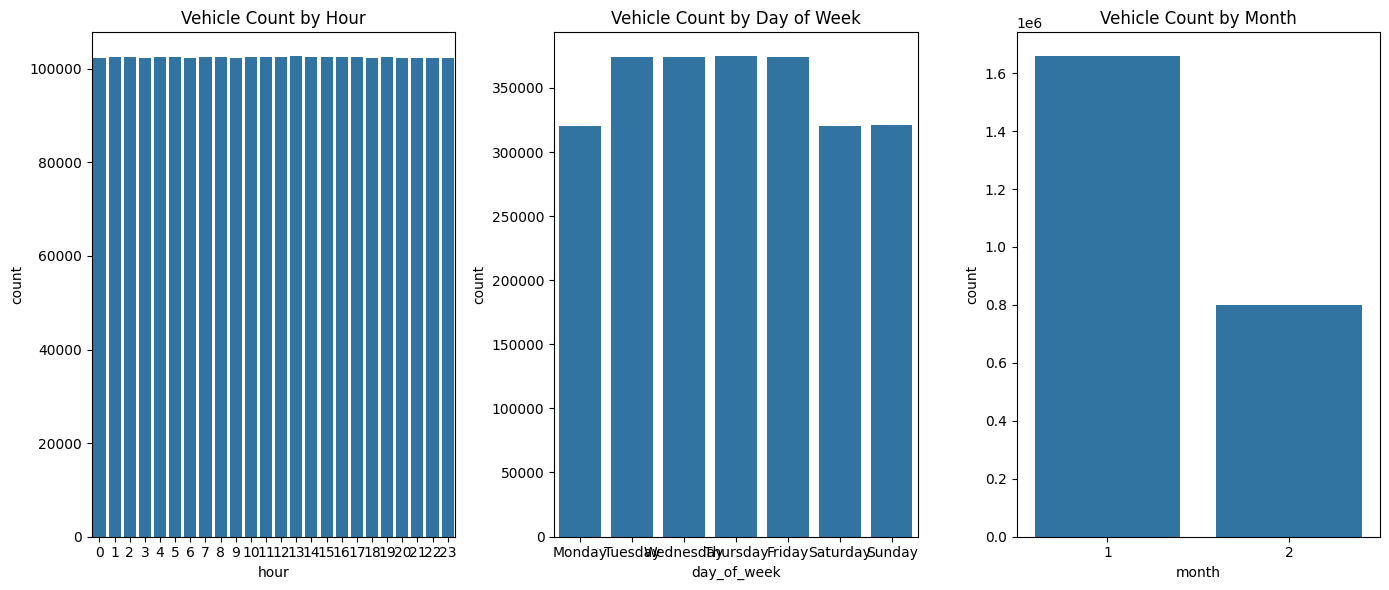

In [50]:
df_traffic['datetime'] = pd.to_datetime(df_traffic['datetime'])

# Univariate Analysis: Summary statistics
print("Summary Statistics:")
print(df_traffic.describe())

# Plot distributions
plt.figure(figsize=(14, 6))

# Histogram: Number of Vehicles
plt.subplot(1, 2, 1)
sns.histplot(df_traffic['no_of_vehicles'], kde=True, bins=20)
plt.title('Distribution of Number of Vehicles')

# Countplot: Accident Frequency
plt.subplot(1, 2, 2)
sns.countplot(x='accident', data=df_traffic)
plt.title('Accident Frequency')

plt.tight_layout()
plt.show()

# Plot distribution over time (hour, day of the week, and month)
df_traffic['hour'] = df_traffic['datetime'].dt.hour
df_traffic['day_of_week'] = df_traffic['datetime'].dt.day_name()
df_traffic['month'] = df_traffic['datetime'].dt.month

plt.figure(figsize=(14, 6))

# Hourly distribution
plt.subplot(1, 3, 1)
sns.countplot(x='hour', data=df_traffic)
plt.title('Vehicle Count by Hour')

# Daily distribution
plt.subplot(1, 3, 2)
sns.countplot(x='day_of_week', data=df_traffic, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Vehicle Count by Day of Week')

# Monthly distribution
plt.subplot(1, 3, 3)
sns.countplot(x='month', data=df_traffic)
plt.title('Vehicle Count by Month')

plt.tight_layout()
plt.show()

1. If we check traffic in majority of routes the traffic lies between 500-700 vehicles. and also traffic with 2500-3500 vehicles is also similar. we also don't find traffic that has 1000-1500 vehicles, and no traffic that has beyond 3000 vehicles

2.In majority of routes the accident proportion is lower as we see 2.5*e^6, so we can say accidents happen but not very common.

3.if we check 24 hours in a day each hour in the routes has atleast 10000 vehicles in all the routes that our bussiness runs, some of the routes still have lower traffic while some have higher traffic.

4.Traffic is quite higher on Tue, wed and thursday. while the weekends and monday are not busy. so inorder to avoid higher traffic and if there are delivery deadlines in these days we can run the delivery on weekends and mondays depending on the time taken to travel and delivery deadlines.

5.  Traffic in January is quite higher may due to new bussiness boomin on a new year but eventually everyhting settled by the Feb.

2024-09-25 11:04:01,152 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-25 11:04:01,779 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


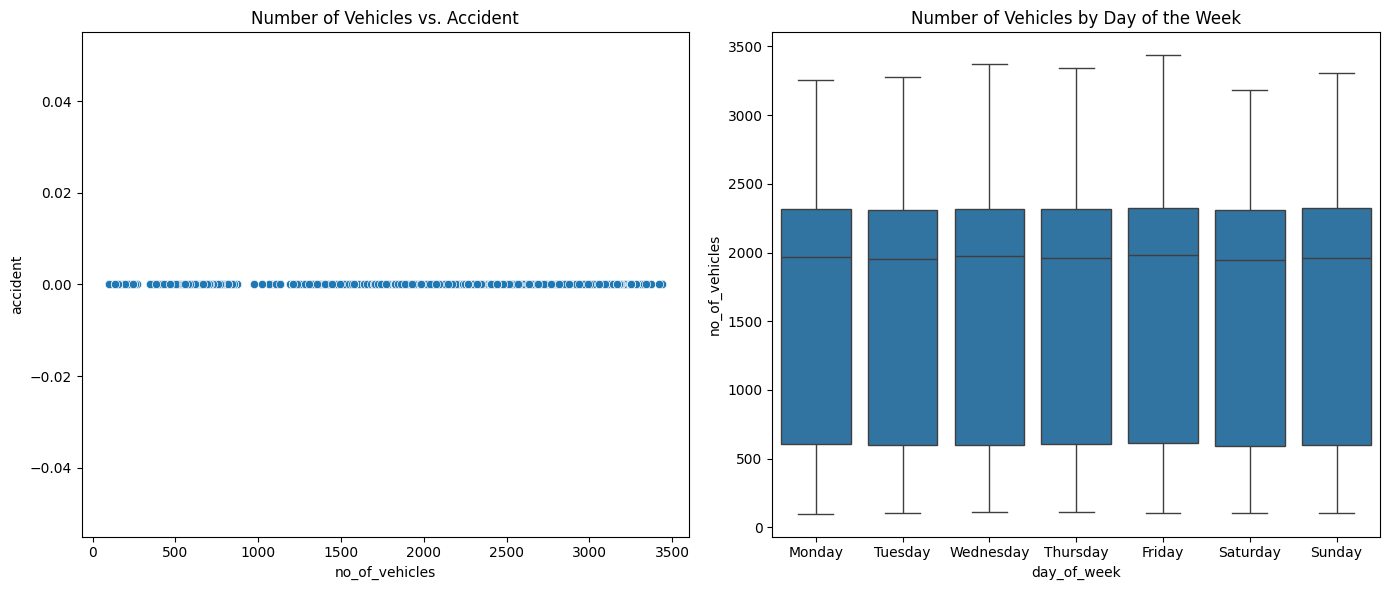

2024-09-25 11:04:04,145 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-25 11:04:04,748 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


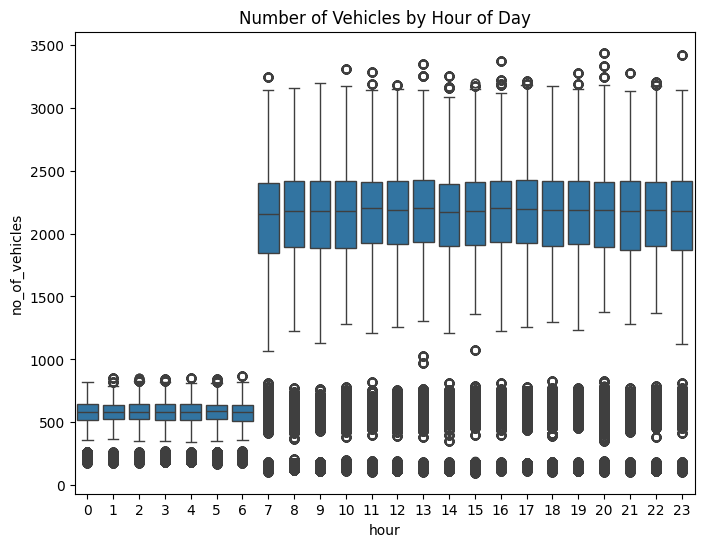

In [51]:
# Bivariate Analysis: Plot relationships between variables

plt.figure(figsize=(14, 6))

# Scatter plot: No of Vehicles vs. Accident
plt.subplot(1, 2, 1)
sns.scatterplot(x='no_of_vehicles', y='accident', data=df_traffic)
plt.title('Number of Vehicles vs. Accident')

# Boxplot: Number of Vehicles by Day of the Week
plt.subplot(1, 2, 2)
sns.boxplot(x='day_of_week', y='no_of_vehicles', data=df_traffic, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Vehicles by Day of the Week')

plt.tight_layout()
plt.show()


# Check the number of vehicles by hour vs accident
plt.figure(figsize=(8, 6))
sns.boxplot(x='hour', y='no_of_vehicles', data=df_traffic)
plt.title('Number of Vehicles by Hour of Day')
plt.show()


1. We have negligible or almost zero accidents which is a good sign that the routes we choose to deliver are pretty good enough and can continue these routes.

2. The traffic everyday is distributed and we have higher traffic after 7 am and is continued till 11 pm. if possible atleast we can have the delivery begin from 11pm in the night and over night deliveries can also have this time range choosen to deliver.

In [52]:
df_routes

,route_id,origin_id,destination_id,distance,average_hours
0,R-6a0225bb,C-e5bfb4e5,C-731988ba,2760.850098,55.220001
1,R-02124ef5,C-c4565ee8,C-3dbd8b2e,2018.079956,40.360001
2,R-ec63e5e9,C-9bbf5d8a,C-2bd47dc5,429.100006,8.580000
3,R-c970877c,C-b5282c3b,C-d80a1e7d,218.309998,4.370000
4,R-69b48415,C-e5bfb4e5,C-73ae5412,1619.869995,32.400002
...,...,...,...,...,...
2347,R-8663c466,C-451776b7,C-9bbf5d8a,2184.699951,43.689999
2348,R-144f4305,C-e6dcda92,C-56b68559,321.109985,6.420000
2349,R-237fd22b,C-b6e04c88,C-639c5e36,1170.780029,23.420000
2350,R-f14d053c,C-40a81eb1,C-b5ff31cd,53.189999,1.060000


Summary Statistics for Numeric Columns:
           distance  average_hours
count   2352.000000    2352.000000
mean    2376.825195      47.536556
std     2696.904297      53.938042
min        3.900000       0.080000
25%      557.364990      11.147500
50%     1104.824951      22.099999
75%     2516.407471      50.327498
max    10055.009766     201.100006


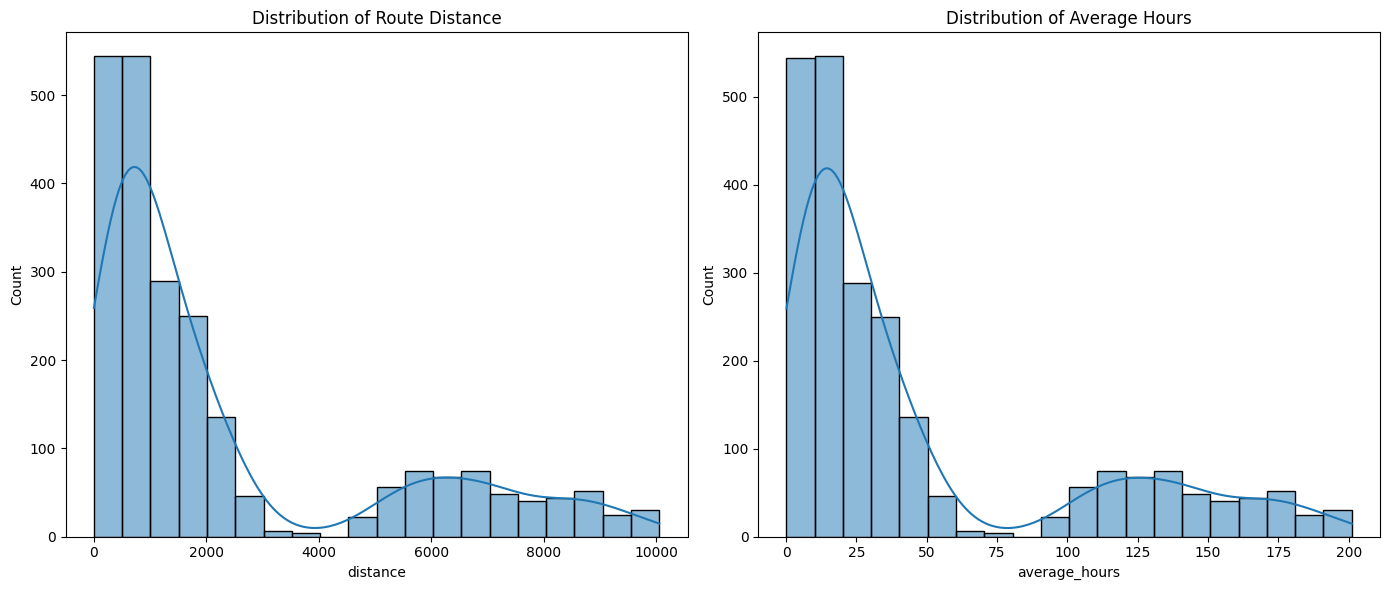

In [53]:
print("Summary Statistics for Numeric Columns:")
print(df_routes[['distance', 'average_hours']].describe())

# Plot distributions
plt.figure(figsize=(14, 6))

# Histogram: Distance
plt.subplot(1, 2, 1)
sns.histplot(df_routes['distance'], kde=True, bins=20)
plt.title('Distribution of Route Distance')

# Histogram: Average Hours
plt.subplot(1, 2, 2)
sns.histplot(df_routes['average_hours'], kde=True, bins=20)
plt.title('Distribution of Average Hours')

plt.tight_layout()
plt.show()

1. The routes we deliver mostly covers a distance of upto 2000 miles.and few long distances from 6000-10000 miles. for shorter distances if we can cover in the span og 6-7 hours we can use the times from 11pm -6am and for longer distances we can choose Sat,Sun,Monday to delivery if delivery deadline permits.

2. since distance increases time increases the same applies to this attribute as well.

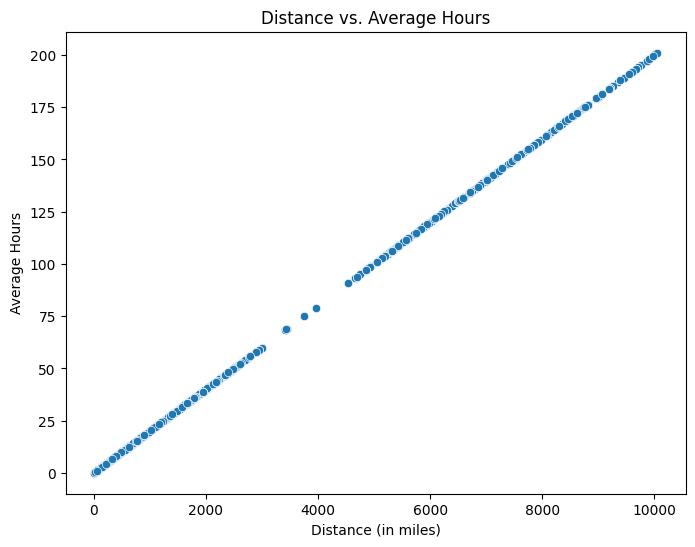

In [54]:
# Bivariate Analysis: Distance vs. Average Hours
plt.figure(figsize=(8, 6))

# Scatter plot: Distance vs. Average Hours
sns.scatterplot(x='distance', y='average_hours', data=df_routes)
plt.title('Distance vs. Average Hours')
plt.xlabel('Distance (in miles)')
plt.ylabel('Average Hours')

plt.show()

This is ofcourse expected to have linear relationship with each other.

In [55]:
df_truck_schedule

,truck_id,route_id,departure_date,estimated_arrival,delay
0,27086559,R-3156d2b2,2019-01-01 07:00:00,2019-01-02 02:45:36,1
1,14688558,R-9e9cc6a6,2019-01-04 07:00:00,2019-01-04 10:51:36,0
2,21539605,R-7171a317,2019-01-13 07:00:00,2019-01-13 20:28:48,0
3,91138034,R-a3875fe2,2019-02-03 07:00:00,2019-02-03 09:47:24,0
4,83770030,R-c12ce254,2019-02-05 07:00:00,2019-02-06 11:12:00,0
...,...,...,...,...,...
12303,27121057,R-e3426e4e,2019-01-25 07:00:00,2019-01-26 00:39:00,1
12304,12323896,R-fe48566e,2019-01-31 07:00:00,2019-01-31 08:19:12,0
12305,24288637,R-ec63e5e9,2019-02-03 07:00:00,2019-02-03 15:34:47,0
12306,21016823,R-213f3356,2019-01-25 07:00:00,2019-01-27 08:51:36,0


Summary Statistics for Numeric Columns:
              delay  trip_duration
count  12308.000000   12308.000000
mean       0.348879      24.793339
std        0.476635      33.626065
min        0.000000       0.080000
25%        0.000000       8.289722
50%        0.000000      15.100000
75%        1.000000      23.710000
max        1.000000     201.100000
2024-09-25 11:16:37,552 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-25 11:16:37,558 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


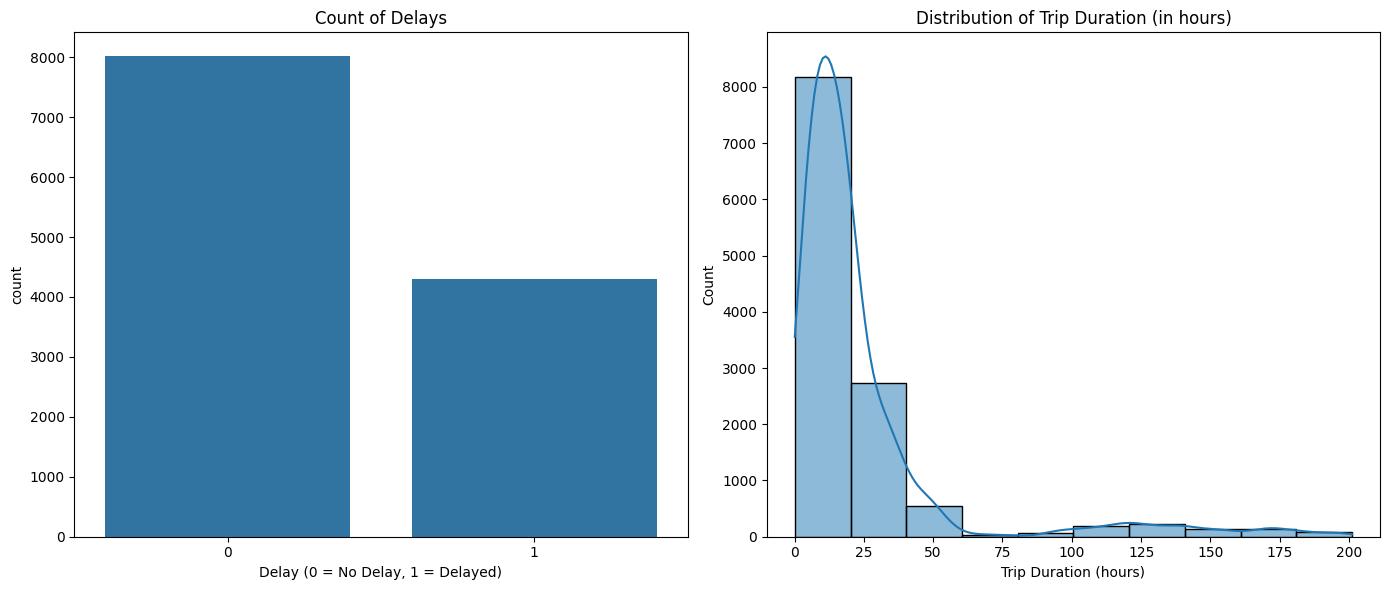

In [57]:
df_truck_schedule['departure_date'] = pd.to_datetime(df_truck_schedule['departure_date'])
df_truck_schedule['estimated_arrival'] = pd.to_datetime(df_truck_schedule['estimated_arrival'])
df_truck_schedule['trip_duration'] = (df_truck_schedule['estimated_arrival'] - df_truck_schedule['departure_date']).dt.total_seconds() / 3600  # Convert to hours

# Univariate: Summary Statistics
print("Summary Statistics for Numeric Columns:")
print(df_truck_schedule[['delay', 'trip_duration']].describe())

# Plot distributions
plt.figure(figsize=(14, 6))

# Histogram: Delay
plt.subplot(1, 2, 1)
sns.countplot(x='delay', data=df_truck_schedule)
plt.title('Count of Delays')
plt.xlabel('Delay (0 = No Delay, 1 = Delayed)')

# Histogram: Trip Duration
plt.subplot(1, 2, 2)
sns.histplot(df_truck_schedule['trip_duration'], kde=True, bins=10)
plt.title('Distribution of Trip Duration (in hours)')
plt.xlabel('Trip Duration (hours)')

plt.tight_layout()
plt.show()

1. Our Delays are exactly 50% of our no delays. This could be due to various factors, like distance , traffic, weather etc lets explore more about this with weather 

2. Our majority of the trip ranges from 0-25 hours. then falls a part as hours keep decreasing and atmost 200hours of time taken to deliver. inorder to address this long distances and shorter distances we can associate with traffic and adjust our truck schedules to make them fall into lower traffic periods in order to avoid delays.

3. Shorter distances that take one day to deliver can be done in days Saturday Sunday and Monday. Longer Distances which takes a week also canm start operation from Thursday where we can avoid 3 days of heavier traffic.

2024-09-25 11:18:20,265 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-25 11:18:20,274 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


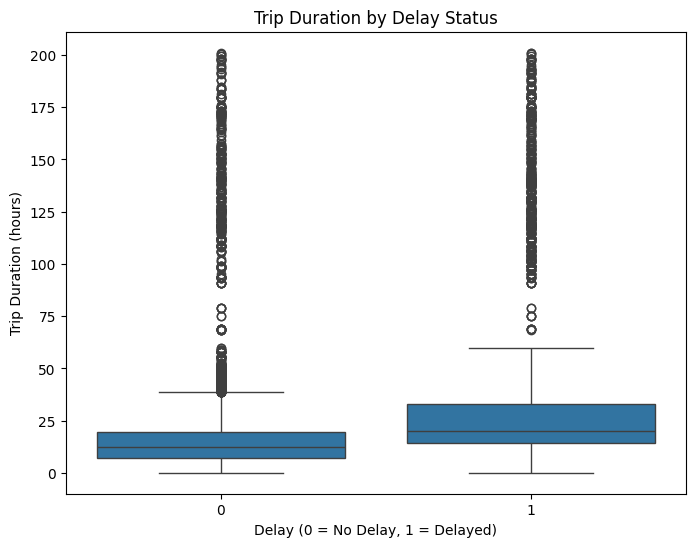

<Figure size 1000x600 with 0 Axes>

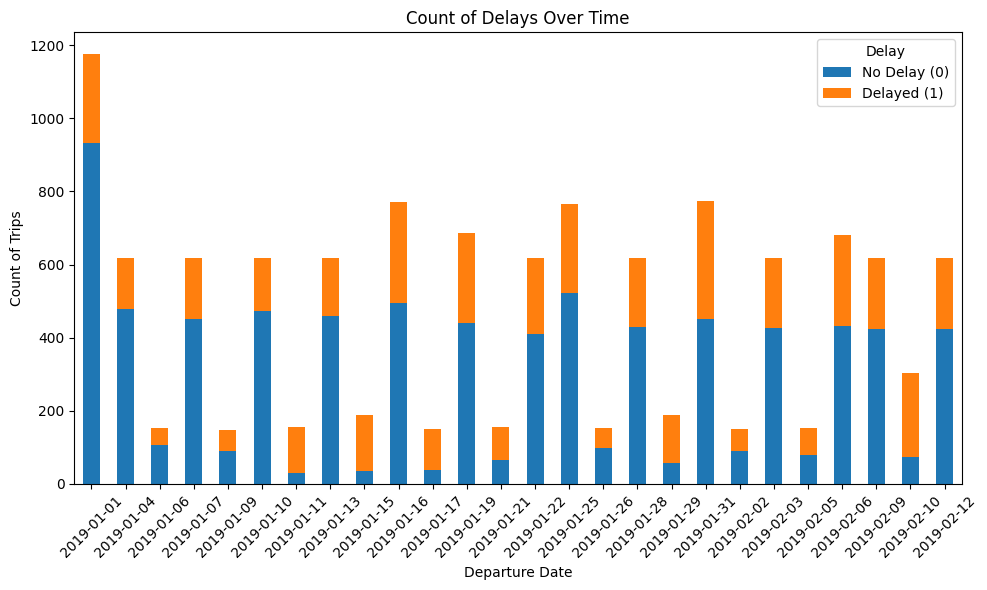

In [58]:
# Bivariate Analysis: Delay vs. Trip Duration
plt.figure(figsize=(8, 6))

# Box plot: Trip Duration by Delay
sns.boxplot(x='delay', y='trip_duration', data=df_truck_schedule)
plt.title('Trip Duration by Delay Status')
plt.xlabel('Delay (0 = No Delay, 1 = Delayed)')
plt.ylabel('Trip Duration (hours)')

plt.show()

# Bivariate Analysis: Delay over time
plt.figure(figsize=(10, 6))

# Line plot: Count of Delays over Departure Dates
df_truck_schedule['departure_date'] = pd.to_datetime(df_truck_schedule['departure_date']).dt.date  # Keep only the date part
delay_counts = df_truck_schedule.groupby(['departure_date', 'delay']).size().unstack().fillna(0)

delay_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Delays Over Time')
plt.xlabel('Departure Date')
plt.ylabel('Count of Trips')
plt.legend(title='Delay', labels=['No Delay (0)', 'Delayed (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Trips that involves One day deliveries almost have no delays. but trips that exceed 48hours of delivery time have seen significant delays this may be due to weather , traffic from Tues - Friday. Also we have seen the delays for the trip time exculding 24 hours have seen delays. May be due to trips starting between Tue - Wed can see delays due to higher traffic.

2. as the dates vs delay bar plot confirms that delay is seen on days where trip starts are Tues, wed seen a higher delay. so even for one day deliveries trip could start at 11pm in the nights to avoid delays atleast covering 50% of route with lower traffic.

In [59]:
df_routes_weather

,route_id,date,temp,wind_speed,description,humidity,pressure
0,R-2e17fb9b,2019-02-02 18:00:00,39,4,Partly cloudy,64,1010
1,R-e636bb23,2019-02-05 18:00:00,45,14,Partly cloudy,85,1005
2,R-073654b1,2019-01-13 12:00:00,48,17,Overcast,79,1018
3,R-d2761115,2019-01-02 12:00:00,45,14,Light rain,90,1002
4,R-20cb905f,2019-02-12 18:00:00,59,7,Sunny,66,1018
...,...,...,...,...,...,...,...
396144,R-4e70c06b,2019-02-06 12:00:00,75,7,Patchy rain possible,75,1007
396145,R-1b9ec3cf,2019-01-14 06:00:00,75,5,Clear,78,1015
396146,R-7c82dd63,2019-01-18 18:00:00,54,6,Partly cloudy,83,1016
396147,R-f93b30d7,2019-02-10 06:00:00,72,2,Sunny,38,1015


Summary Statistics for Numeric Columns:
                temp     wind_speed       humidity       pressure
count  396149.000000  396149.000000  396149.000000  396149.000000
mean       58.616314       7.783935      72.611866    1015.186940
std        18.737573       4.138669      19.901004       6.046233
min        -2.000000       0.000000      14.000000     999.000000
25%        45.000000       5.000000      61.000000    1011.000000
50%        61.000000       7.000000      77.000000    1015.000000
75%        73.000000      11.000000      89.000000    1019.000000
max       109.000000      20.000000     100.000000    1031.000000


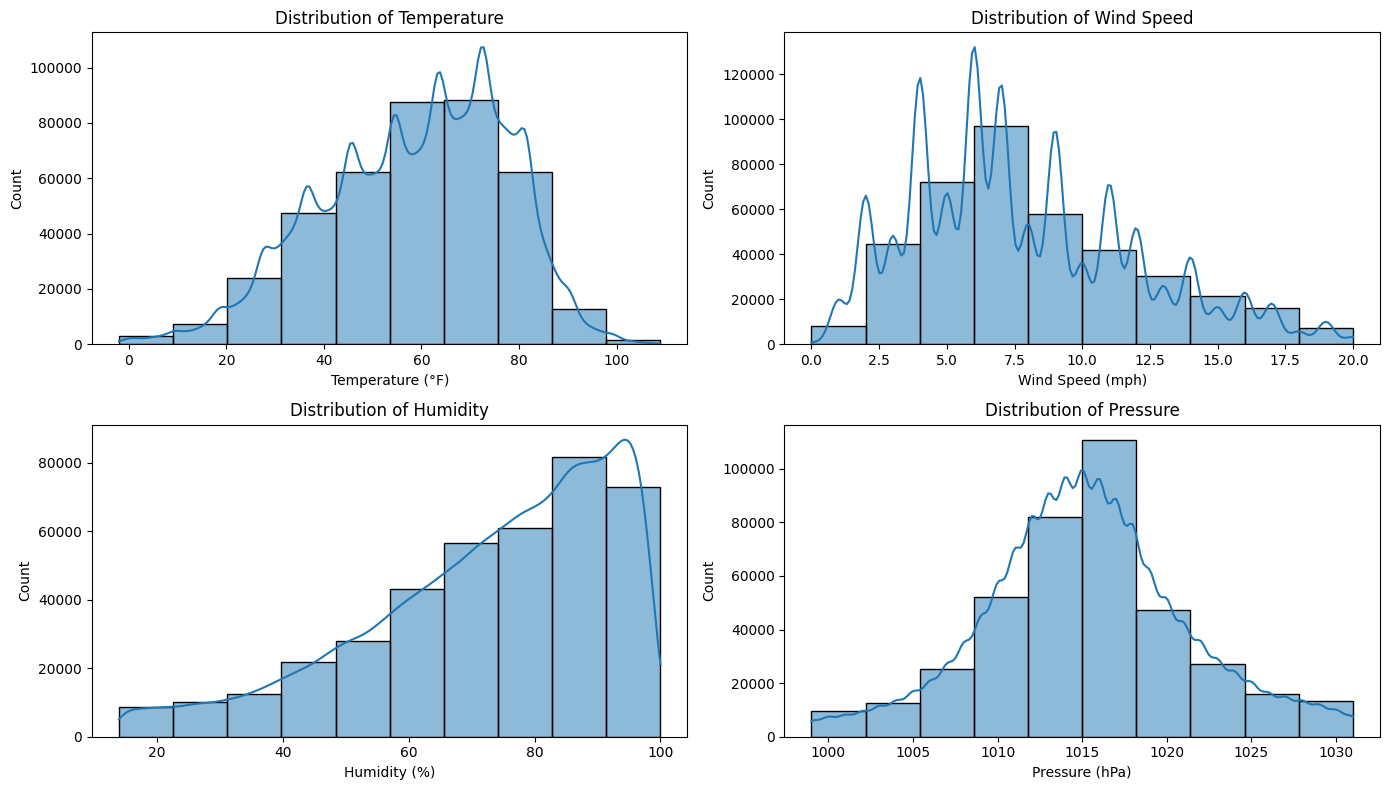

In [60]:
print("Summary Statistics for Numeric Columns:")
print(df_routes_weather[['temp', 'wind_speed', 'humidity', 'pressure']].describe())

# Plot distributions
plt.figure(figsize=(14, 8))

# Histogram: Temperature
plt.subplot(2, 2, 1)
sns.histplot(df_routes_weather['temp'], kde=True, bins=10)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')

# Histogram: Wind Speed
plt.subplot(2, 2, 2)
sns.histplot(df_routes_weather['wind_speed'], kde=True, bins=10)
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (mph)')

# Histogram: Humidity
plt.subplot(2, 2, 3)
sns.histplot(df_routes_weather['humidity'], kde=True, bins=10)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')

# Histogram: Pressure
plt.subplot(2, 2, 4)
sns.histplot(df_routes_weather['pressure'], kde=True, bins=10)
plt.title('Distribution of Pressure')
plt.xlabel('Pressure (hPa)')

plt.tight_layout()
plt.show()

1. Temperature in the routes range from 40 F to 75F where this shows the weather is almost neat majority of routes while we do have lower temperatures like 40-60 and also higher temperatures >75 F this shows different weather conditions and also very unpredictable some times and there would definiteley be delay fro trucks carrying higher heavy loads at very high and extreameley low temperatures. as we have already seen heavy loads leading to delay.

2. Humidity is almost high all the time but tends as routes pass by waterbodies where we have high temeratures or atleast good temperatures.

3.Pressure in the routes mostly ranges from 1010-1020.

4. Wind speed for most of the routes is 7.5 on an average which is a good breeze.some time very high upto 20 this shows routes sometimes effected with storms , rains, and hilly areas as well. which will slow the delivery process and lead to delay 

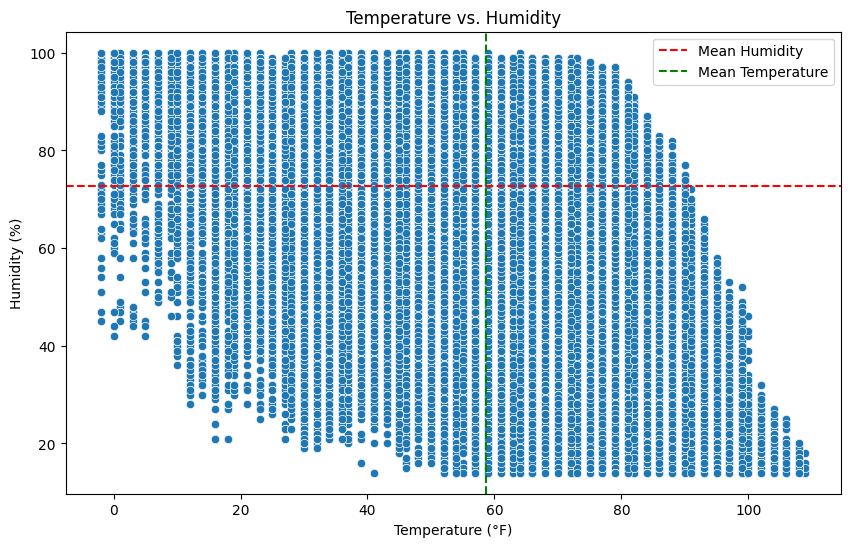

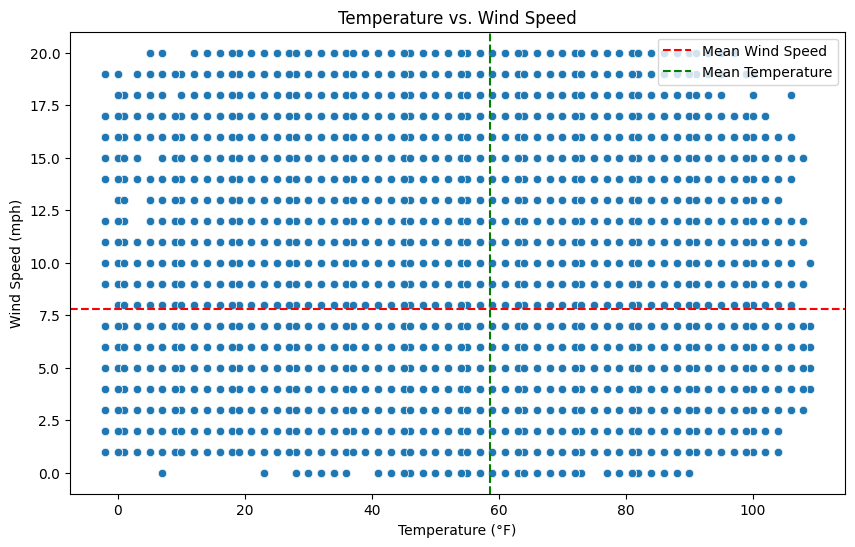

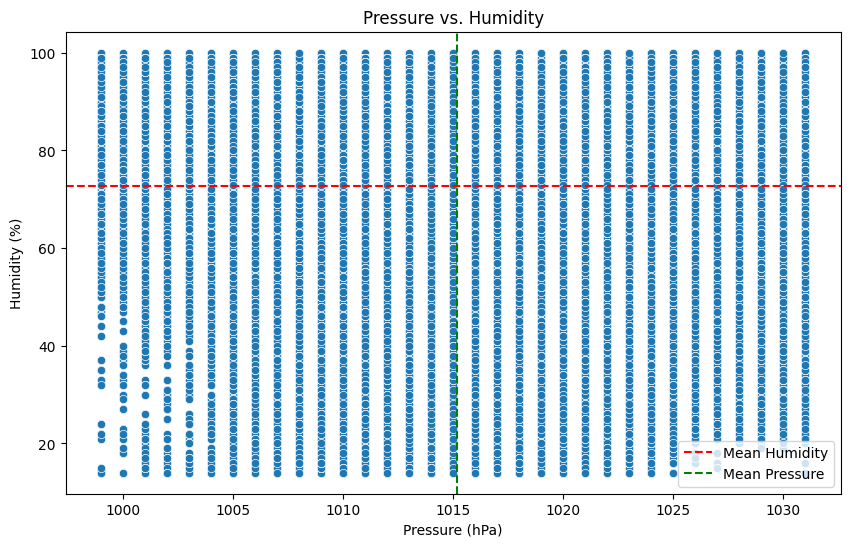

In [61]:
# Bivariate Analysis: Temperature vs. Humidity
plt.figure(figsize=(10, 6))

# Scatter plot: Temperature vs. Humidity
sns.scatterplot(x='temp', y='humidity', data=df_routes_weather)
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°F)')
plt.ylabel('Humidity (%)')
plt.axhline(y=df_routes_weather['humidity'].mean(), color='r', linestyle='--', label='Mean Humidity')
plt.axvline(x=df_routes_weather['temp'].mean(), color='g', linestyle='--', label='Mean Temperature')
plt.legend()
plt.show()

# Bivariate Analysis: Temperature vs. Wind Speed
plt.figure(figsize=(10, 6))

# Scatter plot: Temperature vs. Wind Speed
sns.scatterplot(x='temp', y='wind_speed', data=df_routes_weather)
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°F)')
plt.ylabel('Wind Speed (mph)')
plt.axhline(y=df_routes_weather['wind_speed'].mean(), color='r', linestyle='--', label='Mean Wind Speed')
plt.axvline(x=df_routes_weather['temp'].mean(), color='g', linestyle='--', label='Mean Temperature')
plt.legend()
plt.show()

# Bivariate Analysis: Pressure vs. Humidity
plt.figure(figsize=(10, 6))

# Scatter plot: Pressure vs. Humidity
sns.scatterplot(x='pressure', y='humidity', data=df_routes_weather)
plt.title('Pressure vs. Humidity')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Humidity (%)')
plt.axhline(y=df_routes_weather['humidity'].mean(), color='r', linestyle='--', label='Mean Humidity')
plt.axvline(x=df_routes_weather['pressure'].mean(), color='g', linestyle='--', label='Mean Pressure')
plt.legend()
plt.show()


1. As Temperature is lower humidity is high and as temp increases humidity is low(This shows very tough weather conditons 

2. Temperature and wind speed are evenly distributed , we have good wind conditions most of the time but lower wind speed and higher wind speeds are present in lower and higher temperatures.

3.Same as temeperature and windspeed, pressure and humidity are also distributed.

In [62]:
df_city_weather

,city_id,temp,wind_speed,description,humidity,pressure,datetime
0,C-328bd8d3,32,7,Clear,78,1018,2019-01-03 19:00:00
1,C-b6e04c88,14,13,Sunny,53,1023,2019-01-29 07:00:00
2,C-c7cacd1d,14,3,Clear,82,1030,2019-01-17 05:00:00
3,C-451776b7,57,1,Clear,57,1018,2019-02-08 21:00:00
4,C-56b68559,10,7,Cloudy,89,1023,2019-02-01 23:00:00
...,...,...,...,...,...,...,...
51829,C-b5ff31cd,27,10,Overcast,33,1019,2019-01-28 12:00:00
51830,C-731988ba,84,6,Sunny,47,1010,2019-01-23 14:00:00
51831,C-b25a09de,25,10,Light snow,72,1019,2019-01-25 07:00:00
51832,C-3dbd8b2e,46,4,Partly cloudy,61,1013,2019-01-30 17:00:00


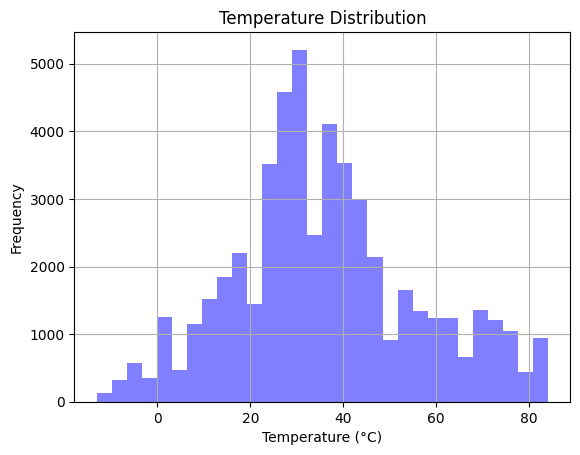

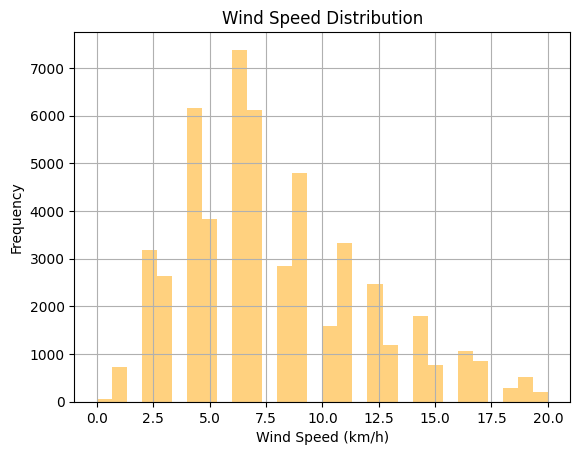

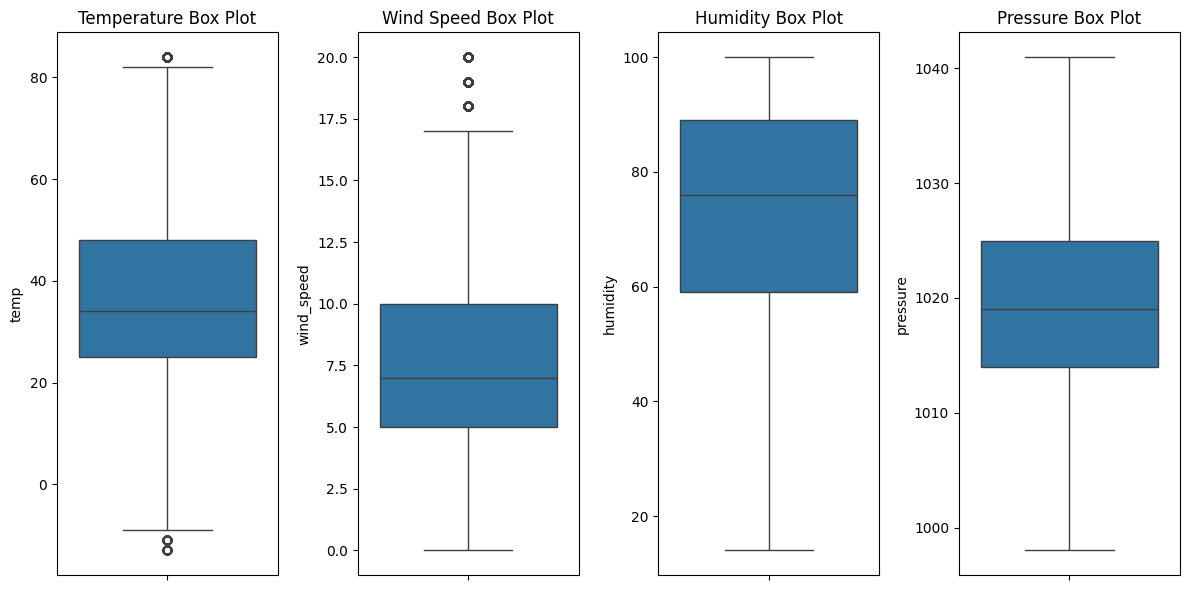

In [63]:
df_city_weather['temp'].hist(bins=30, alpha=0.5, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

df_city_weather['wind_speed'].hist(bins=30, alpha=0.5, color='orange')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

# Box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
sns.boxplot(y='temp', data=df_city_weather)
plt.title('Temperature Box Plot')

plt.subplot(1, 4, 2)
sns.boxplot(y='wind_speed', data=df_city_weather)
plt.title('Wind Speed Box Plot')

plt.subplot(1, 4, 3)
sns.boxplot(y='humidity', data=df_city_weather)
plt.title('Humidity Box Plot')

plt.subplot(1, 4, 4)
sns.boxplot(y='pressure', data=df_city_weather)
plt.title('Pressure Box Plot')

plt.tight_layout()
plt.show()

1. Temperature in the routes range from 25F to 45F where this shows the weather is almost neat majority of routes while we do have lower temperatures like 40-60 and also higher temperatures >85 F this shows different weather conditions and also very unpredictable some times and there would definiteley be delay fro trucks carrying higher heavy loads at very high and extreameley low temperatures. as we have already seen heavy loads leading to delay.

2. Humidity is almost high all the time but tends as routes pass by waterbodies where we have high temeratures or atleast good temperatures.

3.Pressure in the routes mostly ranges from 1010-1020.

4. Wind speed for most of the routes is 7.5 on an average which is a good breeze.some time very high upto 20 this shows routes sometimes effected with storms , rains, and hilly areas as well. which will slow the delivery process and lead to delay 

In [64]:
correlation_matrix = df_city_weather[['temp', 'wind_speed', 'humidity', 'pressure']].corr()
print(correlation_matrix)

                temp  wind_speed  humidity  pressure
temp        1.000000   -0.102276 -0.205655 -0.455979
wind_speed -0.102276    1.000000 -0.041558 -0.205103
humidity   -0.205655   -0.041558  1.000000 -0.178085
pressure   -0.455979   -0.205103 -0.178085  1.000000


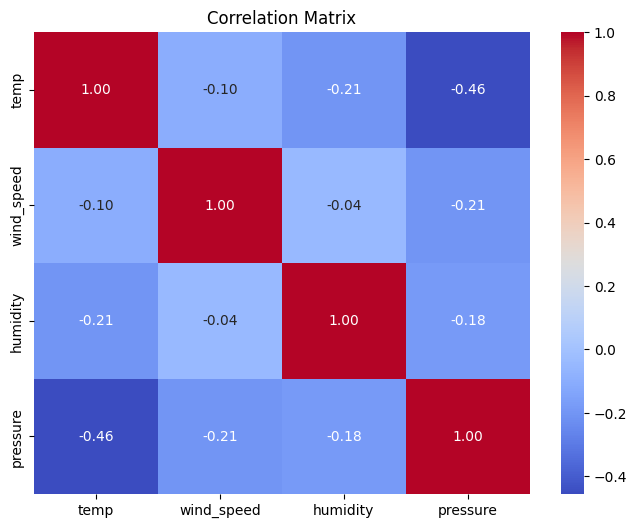

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

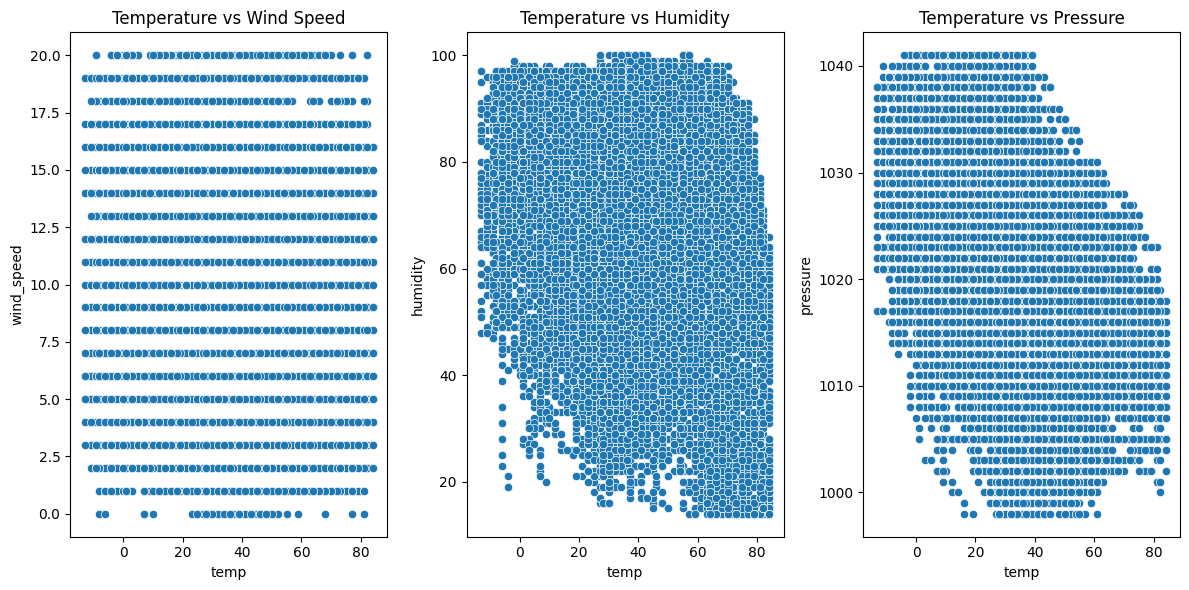

In [66]:
plt.figure(figsize=(12, 6))

# Temperature vs Wind Speed
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='wind_speed', data=df_city_weather)
plt.title('Temperature vs Wind Speed')

# Temperature vs Humidity
plt.subplot(1, 3, 2)
sns.scatterplot(x='temp', y='humidity', data=df_city_weather)
plt.title('Temperature vs Humidity')

# Temperature vs Pressure
plt.subplot(1, 3, 3)
sns.scatterplot(x='temp', y='pressure', data=df_city_weather)
plt.title('Temperature vs Pressure')

plt.tight_layout()
plt.show()


1. As Temperature is lower humidity is high and as temp increases humidity is low(This shows very tough weather conditons 

2. Temperature and wind speed are evenly distributed , we have good wind conditions most of the time but lower wind speed and higher wind speeds are present in lower and higher temperatures.

3.Same as temeperature and windspeed, pressure and humidity are also distributed.

In [68]:
df_traffic

,route_id,no_of_vehicles,accident,datetime,hour,day_of_week,month
0,R-af1c0f31,1728.0,0,2019-02-05 23:00:00,23,Tuesday,2
1,R-b3a6d415,2277.0,0,2019-01-14 16:00:00,16,Monday,1
2,R-373eec36,2127.0,0,2019-02-04 11:00:00,11,Monday,2
3,R-13d6ba5c,609.0,0,2019-01-08 03:00:00,3,Tuesday,1
4,R-9bdd8c00,2259.0,0,2019-01-17 22:00:00,22,Thursday,1
...,...,...,...,...,...,...,...
2459677,R-a6faaa76,468.0,0,2019-01-31 00:00:00,0,Thursday,1
2459678,R-d4576c6e,156.0,0,2019-01-22 09:00:00,9,Tuesday,1
2459679,R-88d4c432,133.0,0,2019-01-12 09:00:00,9,Saturday,1
2459680,R-695dcbf7,2445.0,0,2019-01-20 20:00:00,20,Sunday,1


In [70]:
df_traffic=df_traffic.drop(columns=['hour','day_of_week','month'])

In [71]:
df_trucks

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,20698203,11,4000.0,16,gas
1,21098319,9,6000.0,26,diesel
2,15436397,8,10000.0,23,diesel
3,10379022,9,3000.0,15,gas
4,43523687,12,3000.0,18,gas
...,...,...,...,...,...
1196,29839726,10,20000.0,16,gas
1197,93428273,9,20000.0,18,gas
1198,19695271,13,3000.0,24,diesel
1199,21539605,8,3000.0,18,gas


In [72]:
df_truck_schedule

,truck_id,route_id,departure_date,estimated_arrival,delay,trip_duration
0,27086559,R-3156d2b2,2019-01-01,2019-01-02 02:45:36,1,19.760000
1,14688558,R-9e9cc6a6,2019-01-04,2019-01-04 10:51:36,0,3.860000
2,21539605,R-7171a317,2019-01-13,2019-01-13 20:28:48,0,13.480000
3,91138034,R-a3875fe2,2019-02-03,2019-02-03 09:47:24,0,2.790000
4,83770030,R-c12ce254,2019-02-05,2019-02-06 11:12:00,0,28.200000
...,...,...,...,...,...,...
12303,27121057,R-e3426e4e,2019-01-25,2019-01-26 00:39:00,1,17.650000
12304,12323896,R-fe48566e,2019-01-31,2019-01-31 08:19:12,0,1.320000
12305,24288637,R-ec63e5e9,2019-02-03,2019-02-03 15:34:47,0,8.579722
12306,21016823,R-213f3356,2019-01-25,2019-01-27 08:51:36,0,49.860000


In [73]:
df_truck_schedule = df_truck_schedule.drop(columns=['trip_duration'])

In [74]:
df_city_weather

,city_id,temp,wind_speed,description,humidity,pressure,datetime
0,C-328bd8d3,32,7,Clear,78,1018,2019-01-03 19:00:00
1,C-b6e04c88,14,13,Sunny,53,1023,2019-01-29 07:00:00
2,C-c7cacd1d,14,3,Clear,82,1030,2019-01-17 05:00:00
3,C-451776b7,57,1,Clear,57,1018,2019-02-08 21:00:00
4,C-56b68559,10,7,Cloudy,89,1023,2019-02-01 23:00:00
...,...,...,...,...,...,...,...
51829,C-b5ff31cd,27,10,Overcast,33,1019,2019-01-28 12:00:00
51830,C-731988ba,84,6,Sunny,47,1010,2019-01-23 14:00:00
51831,C-b25a09de,25,10,Light snow,72,1019,2019-01-25 07:00:00
51832,C-3dbd8b2e,46,4,Partly cloudy,61,1013,2019-01-30 17:00:00


In [75]:
df_routes_weather

,route_id,date,temp,wind_speed,description,humidity,pressure
0,R-2e17fb9b,2019-02-02 18:00:00,39,4,Partly cloudy,64,1010
1,R-e636bb23,2019-02-05 18:00:00,45,14,Partly cloudy,85,1005
2,R-073654b1,2019-01-13 12:00:00,48,17,Overcast,79,1018
3,R-d2761115,2019-01-02 12:00:00,45,14,Light rain,90,1002
4,R-20cb905f,2019-02-12 18:00:00,59,7,Sunny,66,1018
...,...,...,...,...,...,...,...
396144,R-4e70c06b,2019-02-06 12:00:00,75,7,Patchy rain possible,75,1007
396145,R-1b9ec3cf,2019-01-14 06:00:00,75,5,Clear,78,1015
396146,R-7c82dd63,2019-01-18 18:00:00,54,6,Partly cloudy,83,1016
396147,R-f93b30d7,2019-02-10 06:00:00,72,2,Sunny,38,1015


In [76]:
df_routes

,route_id,origin_id,destination_id,distance,average_hours
0,R-6a0225bb,C-e5bfb4e5,C-731988ba,2760.850098,55.220001
1,R-02124ef5,C-c4565ee8,C-3dbd8b2e,2018.079956,40.360001
2,R-ec63e5e9,C-9bbf5d8a,C-2bd47dc5,429.100006,8.580000
3,R-c970877c,C-b5282c3b,C-d80a1e7d,218.309998,4.370000
4,R-69b48415,C-e5bfb4e5,C-73ae5412,1619.869995,32.400002
...,...,...,...,...,...
2347,R-8663c466,C-451776b7,C-9bbf5d8a,2184.699951,43.689999
2348,R-144f4305,C-e6dcda92,C-56b68559,321.109985,6.420000
2349,R-237fd22b,C-b6e04c88,C-639c5e36,1170.780029,23.420000
2350,R-f14d053c,C-40a81eb1,C-b5ff31cd,53.189999,1.060000


In [77]:
df_truck

,truck_id,route_id,departure_date,estimated_arrival,delay
0,27086559,R-3156d2b2,2019-01-01,2019-01-02 02:45:36,1
1,14688558,R-9e9cc6a6,2019-01-04,2019-01-04 10:51:36,0
2,21539605,R-7171a317,2019-01-13,2019-01-13 20:28:48,0
3,91138034,R-a3875fe2,2019-02-03,2019-02-03 09:47:24,0
4,83770030,R-c12ce254,2019-02-05,2019-02-06 11:12:00,0
...,...,...,...,...,...
12303,27121057,R-e3426e4e,2019-01-25,2019-01-26 00:39:00,1
12304,12323896,R-fe48566e,2019-01-31,2019-01-31 08:19:12,0
12305,24288637,R-ec63e5e9,2019-02-03,2019-02-03 15:34:47,0
12306,21016823,R-213f3356,2019-01-25,2019-01-27 08:51:36,0


In [78]:
df_drivers

,driver_id,name,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,a082299f-f,Justin Robbins,48,19.0,conservative,7,20698203,45.880001
1,714f9353-9,Charles Malone,46,13.0,proactive,4,21098319,60.130001
2,4f55b204-f,Xavier Johnson,47,1.0,proactive,8,15436397,60.919998
3,363151a2-e,Thomas Goodman,45,15.0,proactive,4,10379022,59.049999
4,d1a55f05-9,James Alvarez,47,3.0,proactive,4,43523687,61.369999
...,...,...,...,...,...,...,...,...
1278,1ad470f8-9,Zachary Woods,50,10.0,conservative,3,93428273,38.810001
1279,53f3f0fb-d,Patrick Fuentes,39,5.0,conservative,3,21539605,47.220001
1280,fc5bb863-b,Robert Cohen,42,13.0,proactive,8,19695271,65.040001
1281,8460ef47-6,Nicholas Martinez,56,18.0,proactive,6,10008392,60.740002
